In [1]:
import braingeneers
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys
import matplotlib.pyplot as plt
import numpy as np
import collections

In [2]:
data_path = "s3://braingeneers/ephys/2022-05-18-e-connectoid/derived/kilosort2/"
old_result_path = data_path + "Trace_20220518_12_53_35_chip11350_phy.zip"
new_result_path = data_path + "Trace_20220518_12_53_35_chip11350_phy_0940.zip"

### plot new and old result side by side

In [3]:
def plot_inset(axs, k, ch, position, temp_chs, temp_pos, templates, filename, nelec=2):
    # fig, axs = plt.subplots(figsize=(16, 9), facecolor='white')
    axs.set_title("{}".format(filename) + " cluster {} ".format(k) + "channel {} ".format(str(ch) + str(position)))
    assert len(temp_chs) == len(temp_pos) == len(templates), "Input length should be the same!"
    nums = len(temp_chs)
    pitch = 17.5
    axs.scatter(position[0], position[1], linewidth=10, alpha=0.2, color='grey')
    axs.text(position[0], position[1], str(position), color="g", fontsize=12)
    # set same scaling to the insets
    index = temp_chs.index(ch)
    ylim_min = min(templates[index])
    ylim_max = max(templates[index])
    # ylim_margin = (ylim_max - ylim_min)/10
    ylim_margin = 0
    # choose channels that are close to the center channel
    for i in range(nums):
        chn_pos = temp_pos[i]
        if position[0] - nelec * pitch <= chn_pos[0] <= position[0] + nelec * pitch \
                and position[1] - nelec * pitch <= chn_pos[1] <= position[1] + nelec * pitch:
            # axs.scatter(chn_pos[0], chn_pos[1], color='w')
            axin = axs.inset_axes([chn_pos[0]-5, chn_pos[1]-5, 10, 10], transform=axs.transData)
            axin.plot(templates[i], color='k', linewidth=2, alpha=0.7)
            axin.set_ylim([ylim_min - ylim_margin, ylim_max + ylim_margin])
            axin.set_axis_off()
    # axs.legend(loc="upper right", fontsize=12)
    # axs.xaxis.set_visible(False)
    # axs.yaxis.set_visible(False)
    axs.set_xlim(position[0]-2*nelec*pitch, position[0]+2*nelec*pitch)
    axs.set_ylim(position[1]-2*nelec*pitch, position[1]+2*nelec*pitch)
    axs.invert_yaxis()
    return axs

In [4]:
def get_data_dict(neuron_dict, key):
    ch = neuron_dict[key]['channel']
    pos = neuron_dict[key]['position']
    temp_chs = neuron_dict[key]['neighbor_channels']
    temp_pos = neuron_dict[key]['neighbor_positions']
    templates = neuron_dict[key]['neighbor_templates']
    return ch, pos, temp_chs, temp_pos, templates

In [5]:
def plot_footprint_comp(path_1, path_2, figure_name_1, figure_name_2):
    spike_data_1 = analysis.read_phy_files(path_1)
    spike_data_2 = analysis.read_phy_files(path_2)
    neuron_dict_1 = spike_data_1.neuron_data[0]
    neuron_dict_2 = spike_data_2.neuron_data[0]
    nums_1, nums_2 = len(neuron_dict_1), len(neuron_dict_2)
    if nums_1 < nums_2:
        # neuron_dict_1 is always the longer one
        neuron_dict_1, neuron_dict_2 = neuron_dict_2.copy(), neuron_dict_1.copy()
        figure_name_1, figure_name_2 = figure_name_2, figure_name_1
    # Plot each unit as new on the left and old on the right. Find the matched position for each unit.  
    # TODO: If no matched position, find the nearest position.
    # If no nearest, just plot on one side. 
    matched_position = collections.defaultdict(list)  # {pos:[cluster_1, cluster_2]}
    for k in neuron_dict_2.keys():
        matched_position[neuron_dict_2[k]['position']].append(k)

    for k in neuron_dict_1.keys():
        ch_1, pos_1, temp_chs_1, temp_pos_1, templates_1 = get_data_dict(neuron_dict_1, k)
        matched = matched_position[pos_1]
        if matched:
            for kk in matched:
                ch_2, pos_2, temp_chs_2, temp_pos_2, templates_2 = get_data_dict(neuron_dict_2, kk)
                fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')
                plot_inset(axs1, k, ch_1, pos_1, temp_chs_1, temp_pos_1, templates_1, figure_name_1)
                plot_inset(axs2, kk, ch_2, pos_2, temp_chs_2, temp_pos_2, templates_2, figure_name_2)
                plt.savefig("compare_0518_cluster_{}-{}.png".format(k, kk), dpi=300)
        else:
            fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')
            plot_inset(axs1, k, ch_1, pos_1, temp_chs_1, temp_pos_1, templates_1, figure_name_1)
            plt.savefig("compare_0518_cluster_{}.png".format(k), dpi=300)


/tmp/ipykernel_10334/3186840705.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(16, 6), facecolor='white')


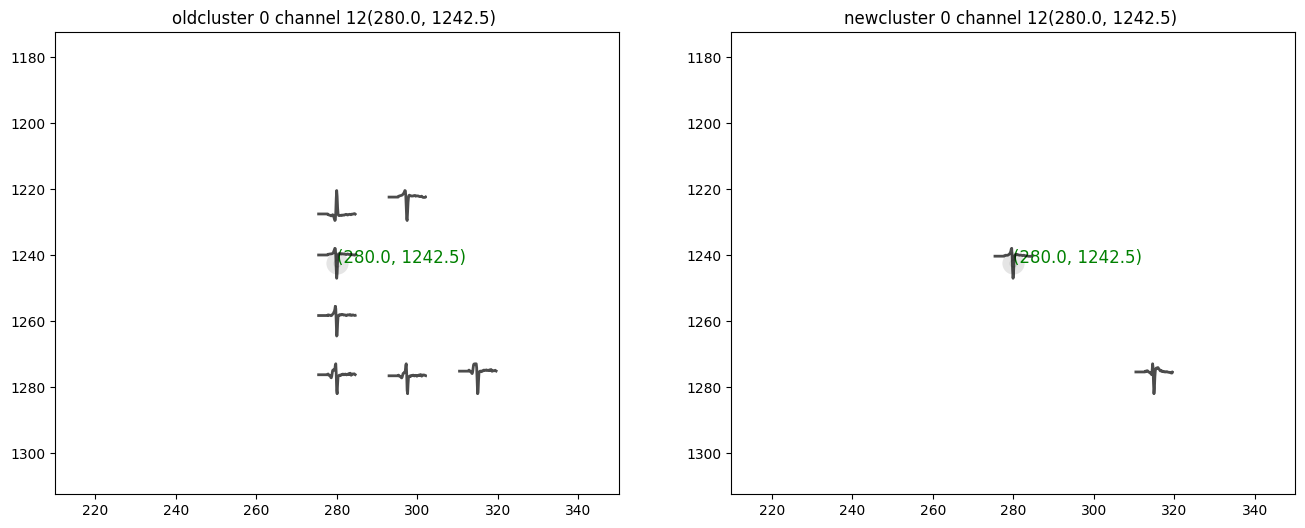

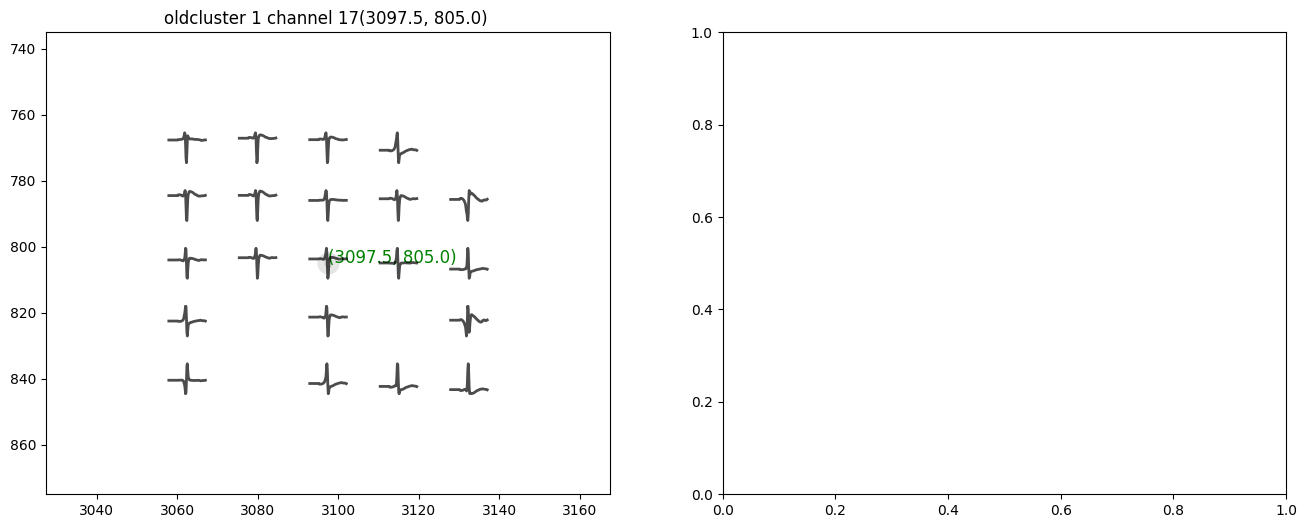

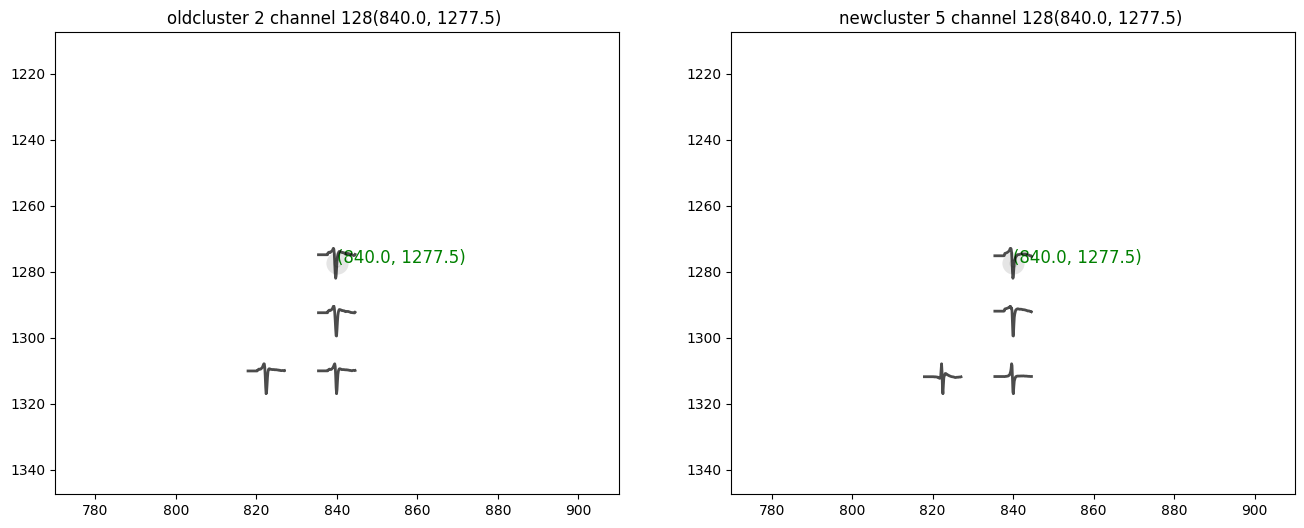

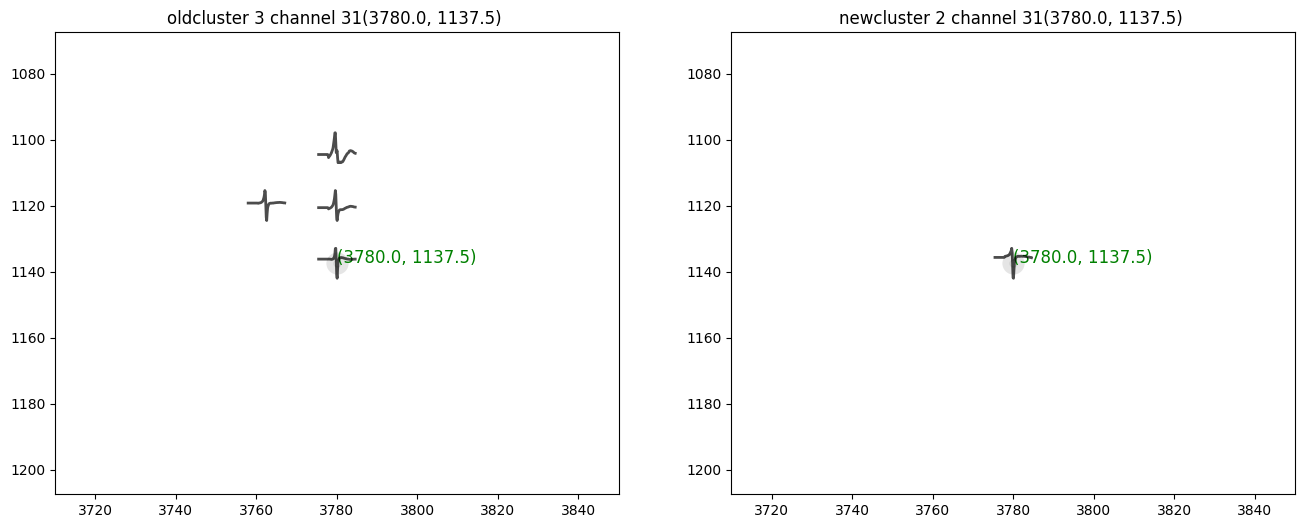

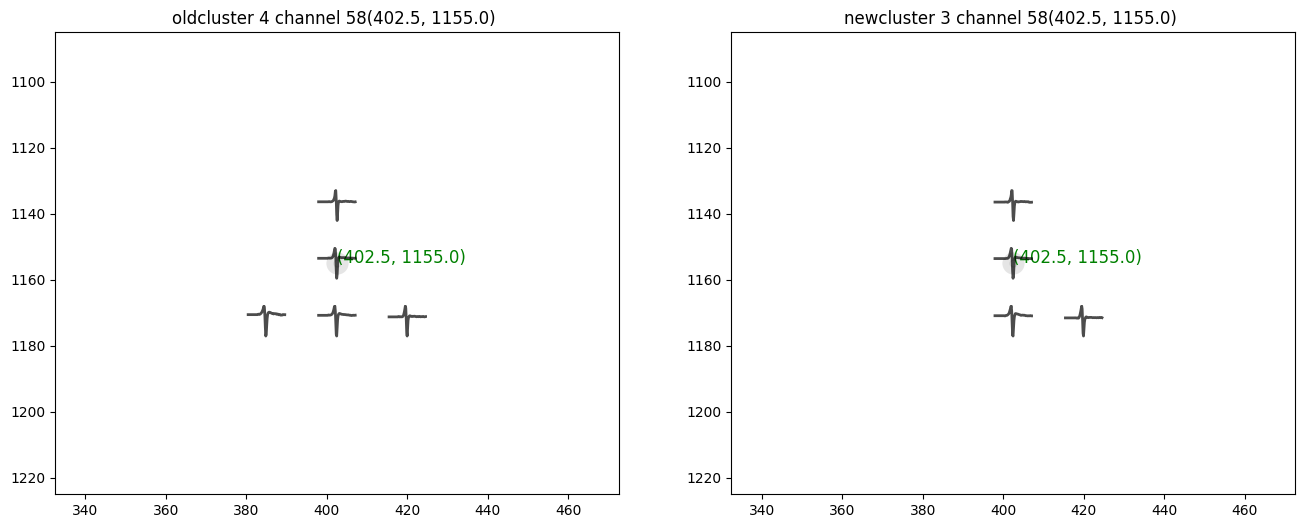

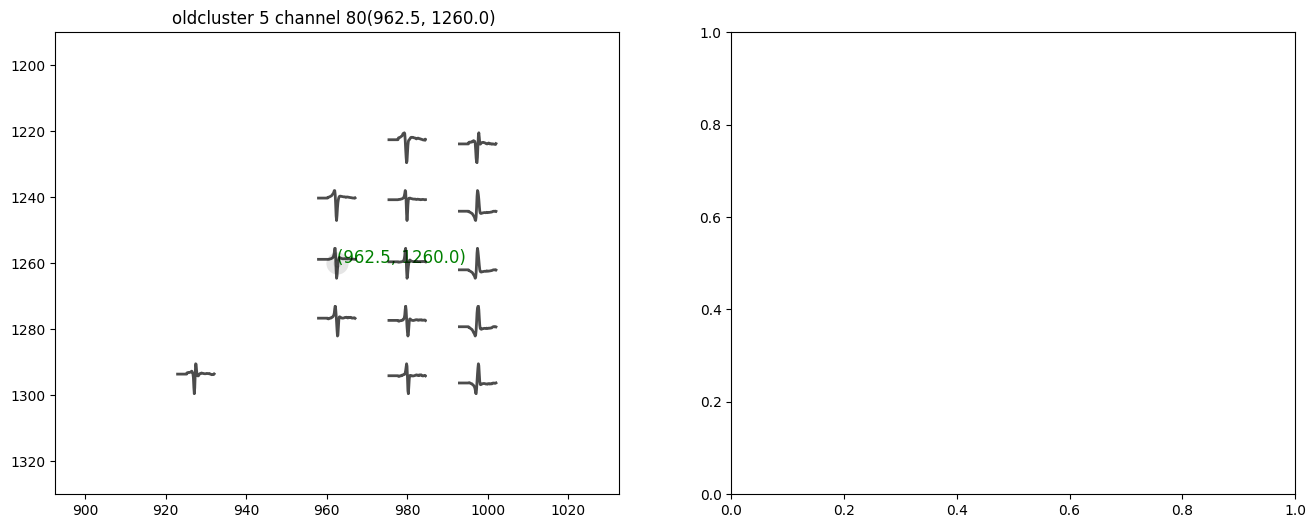

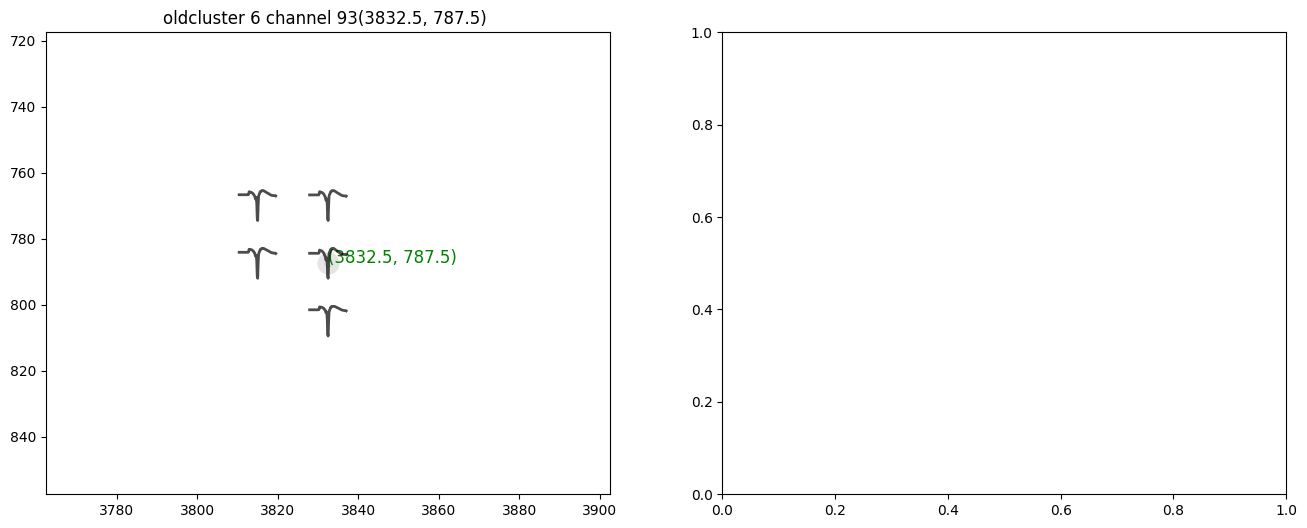

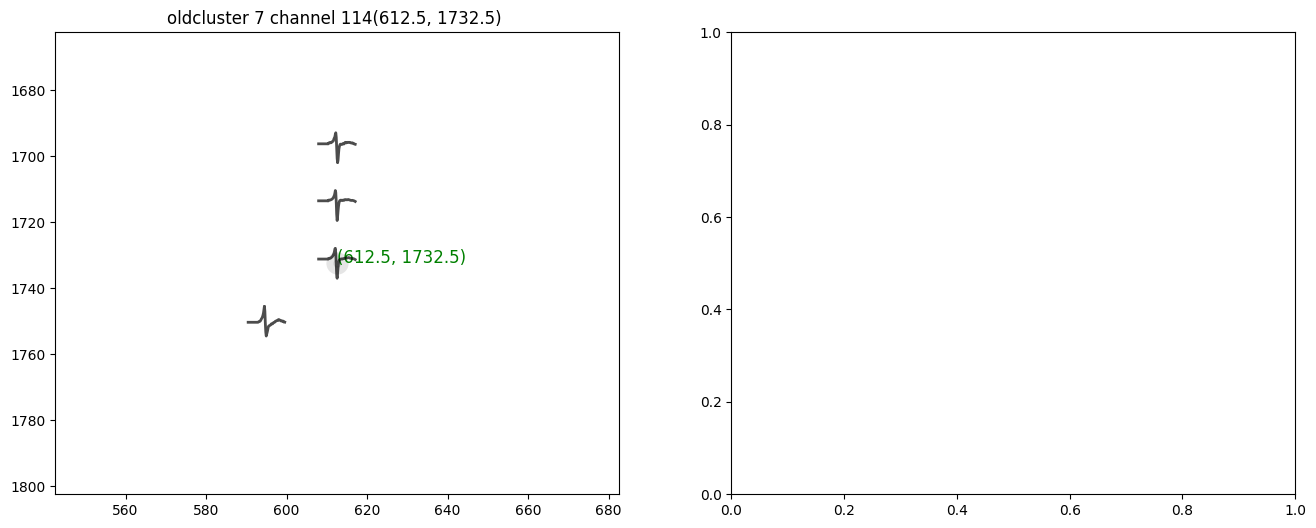

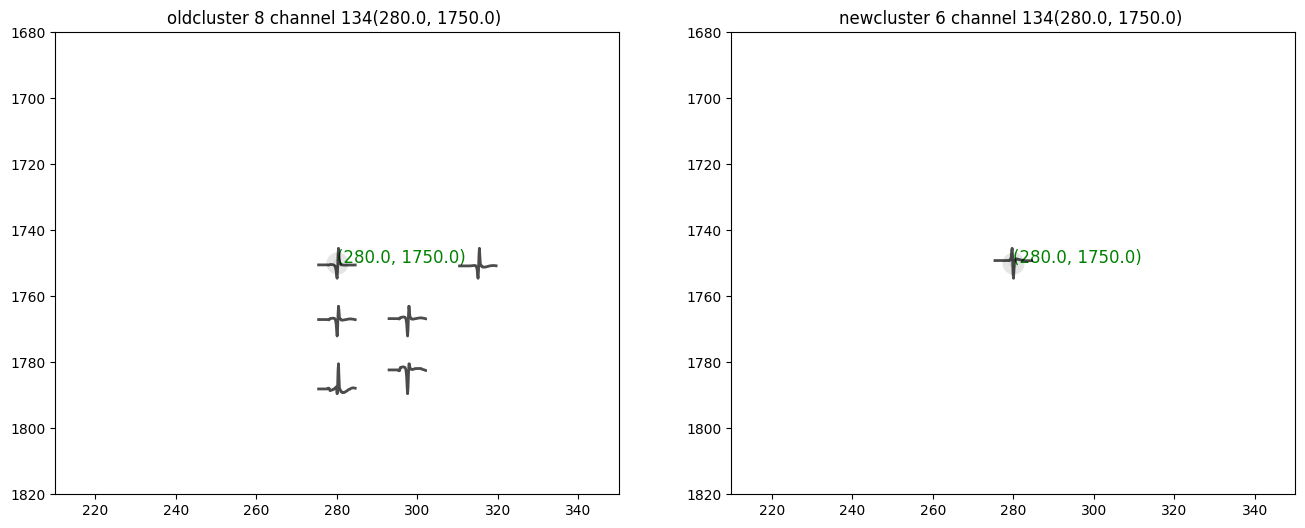

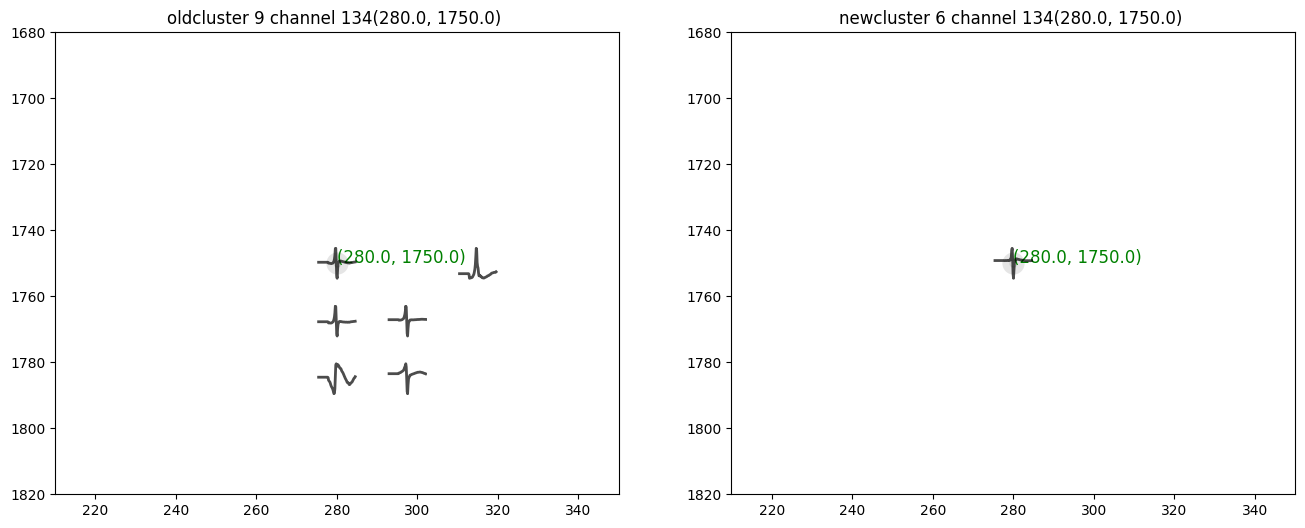

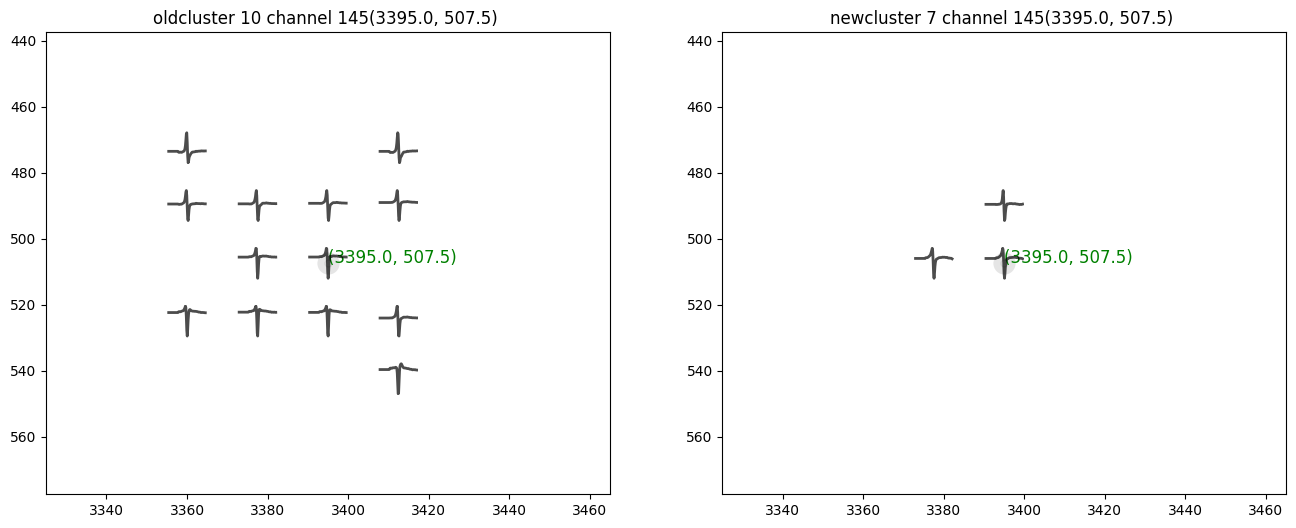

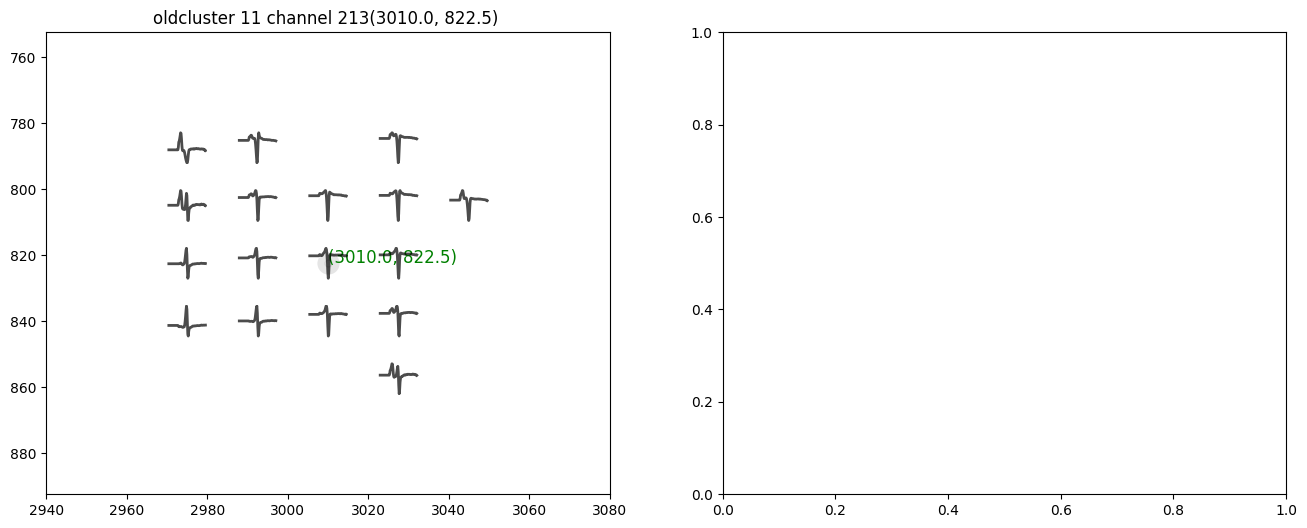

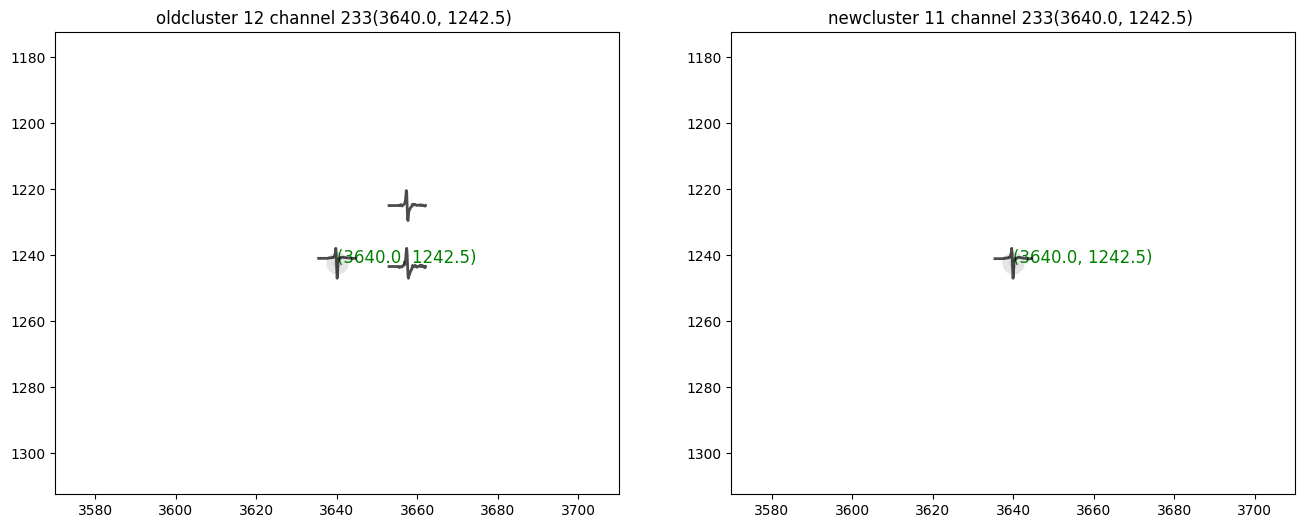

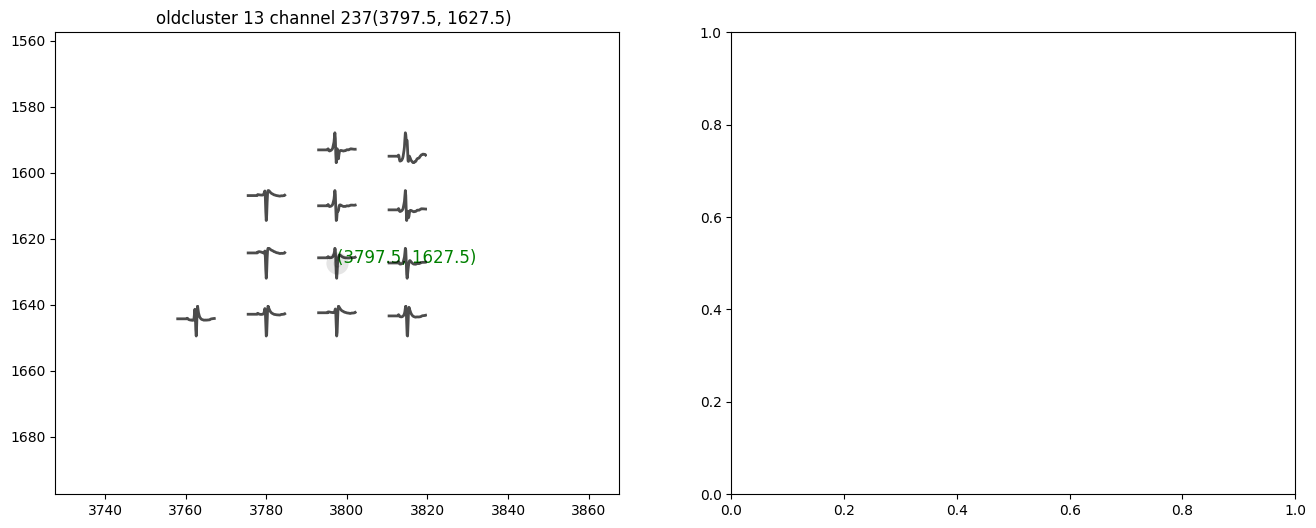

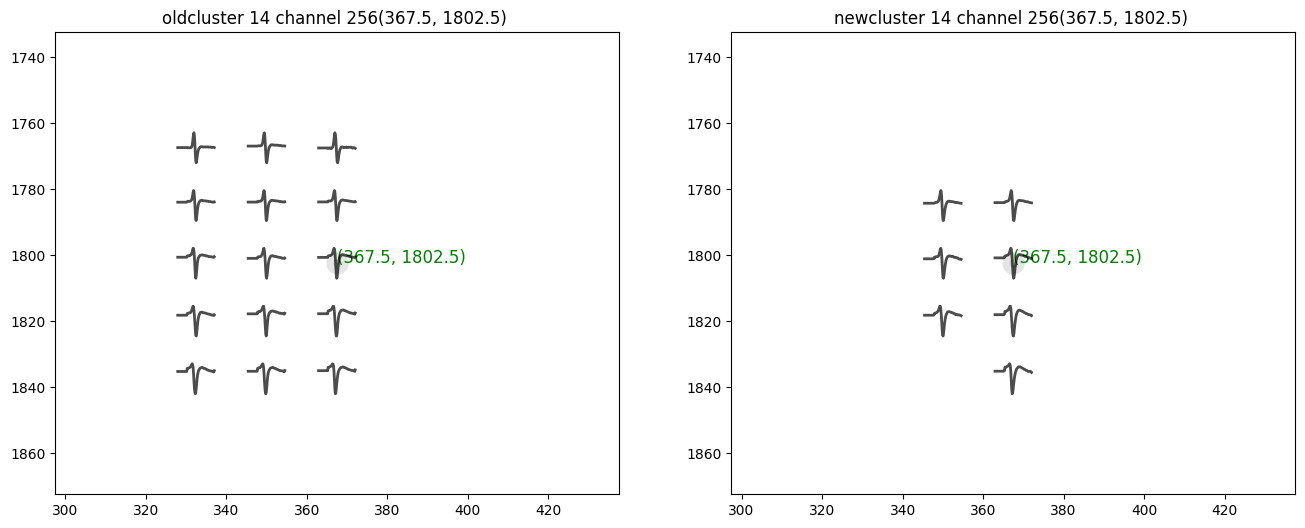

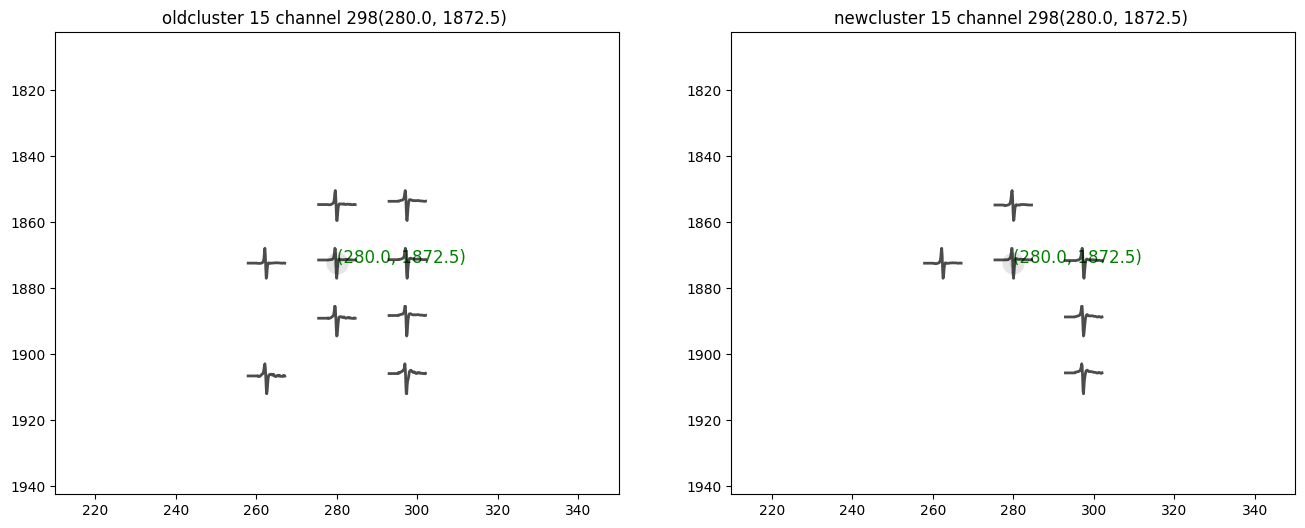

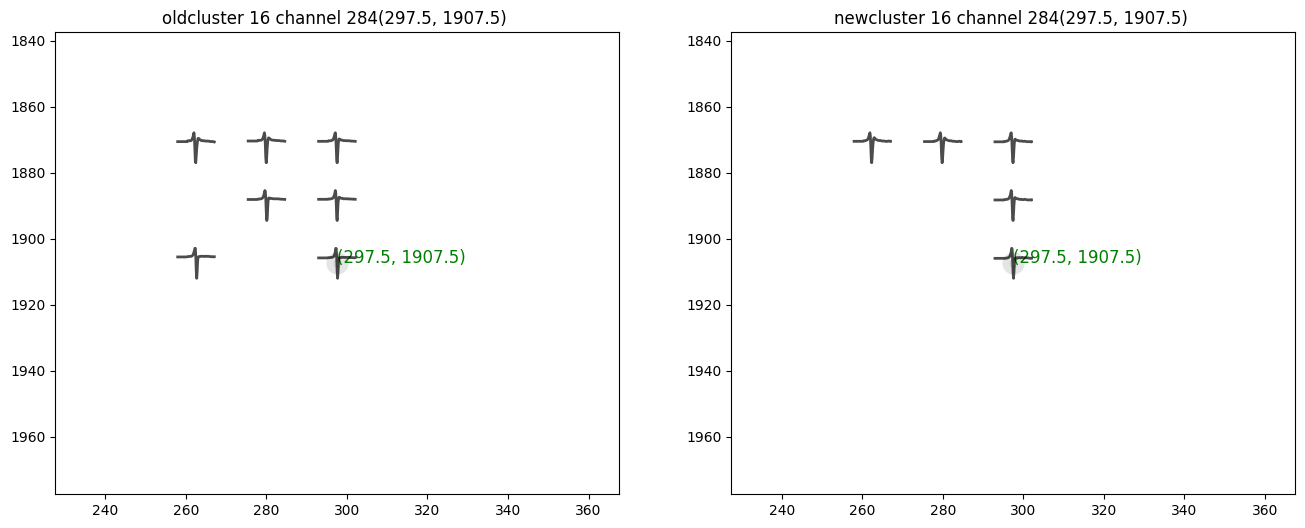

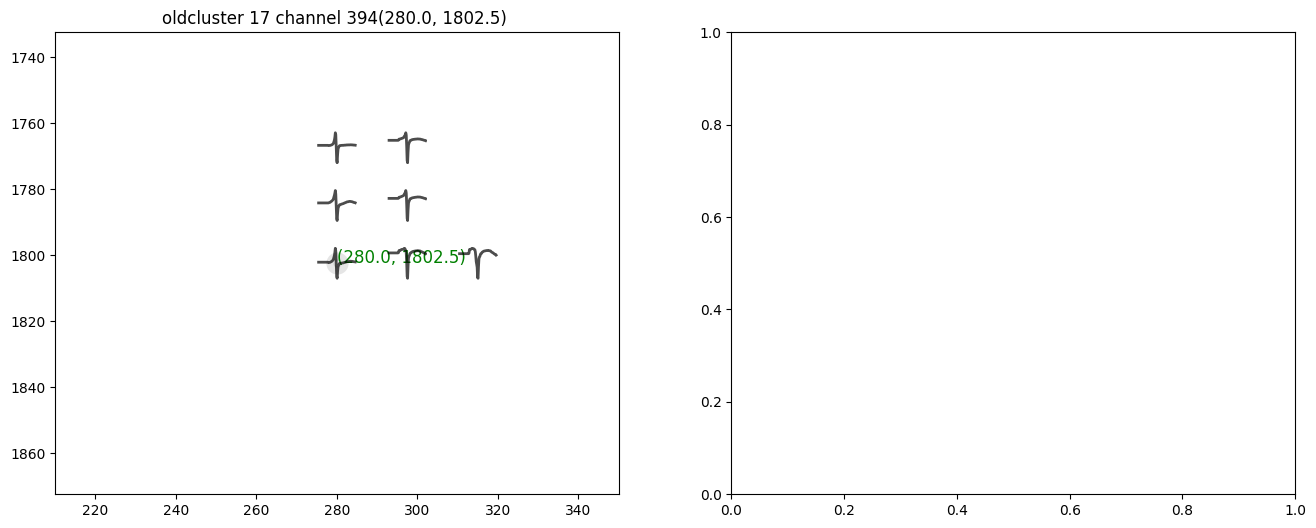

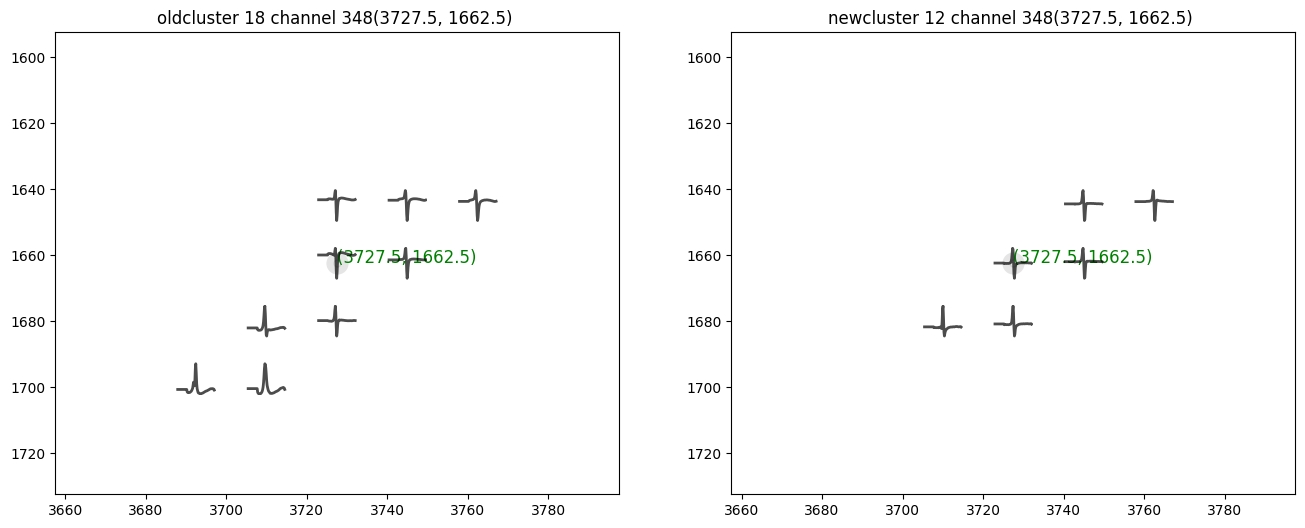

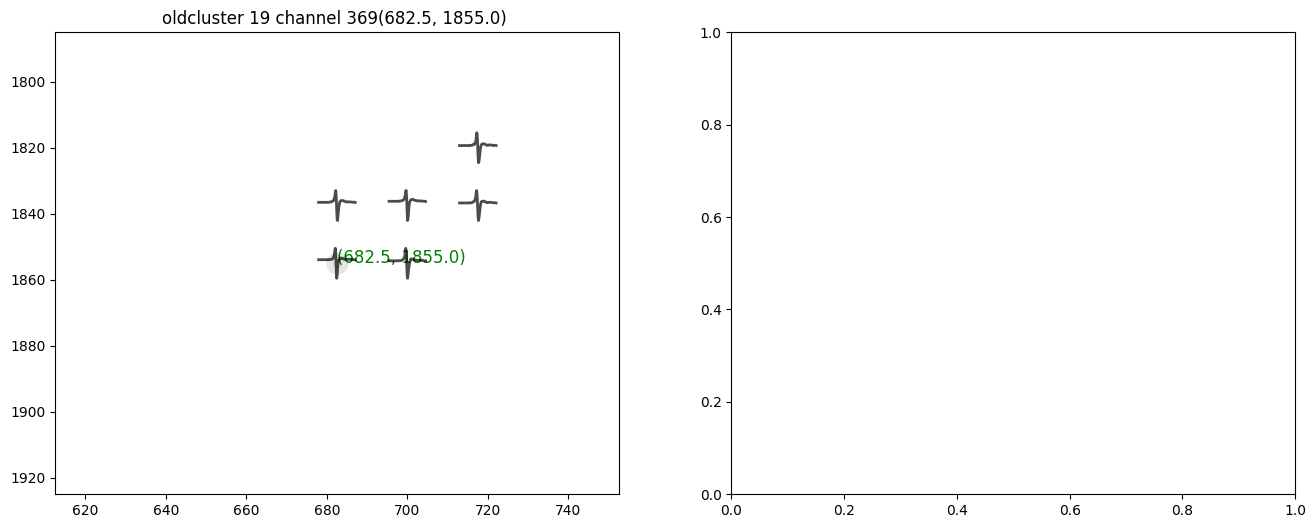

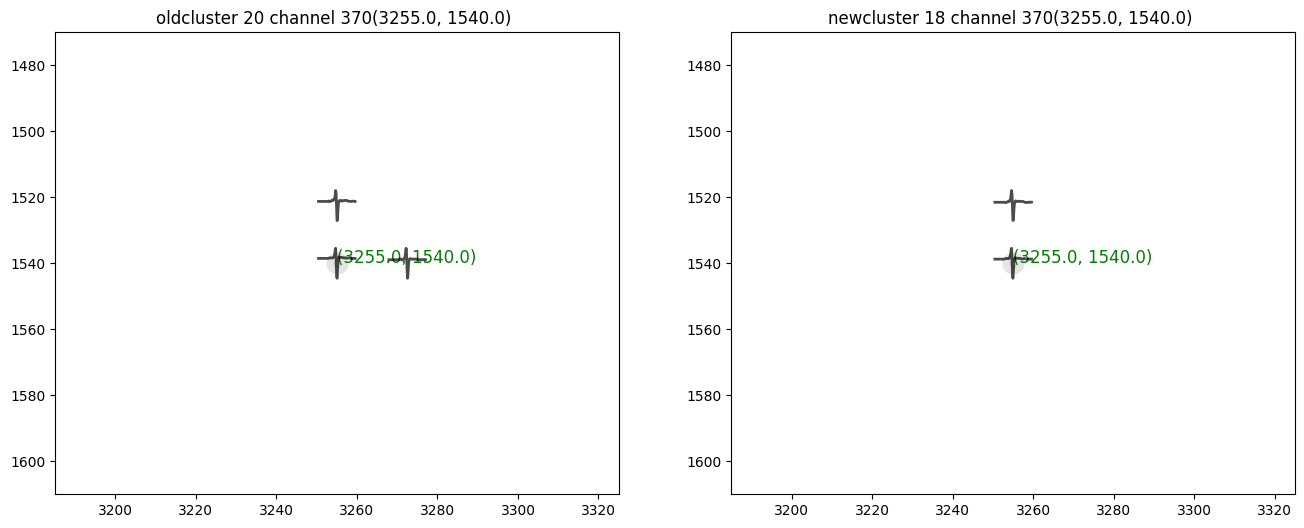

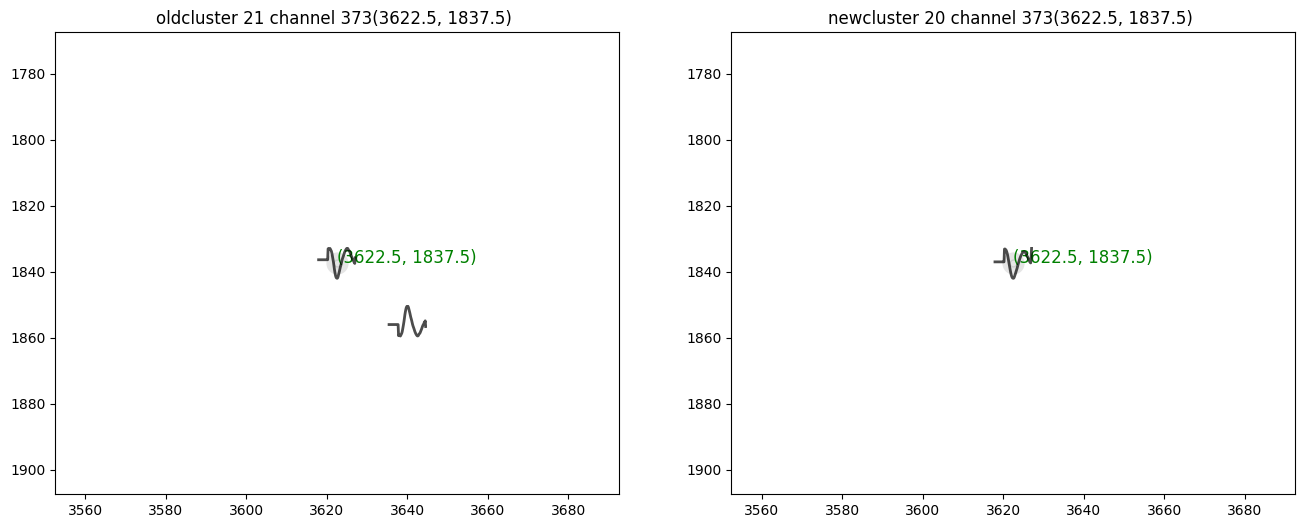

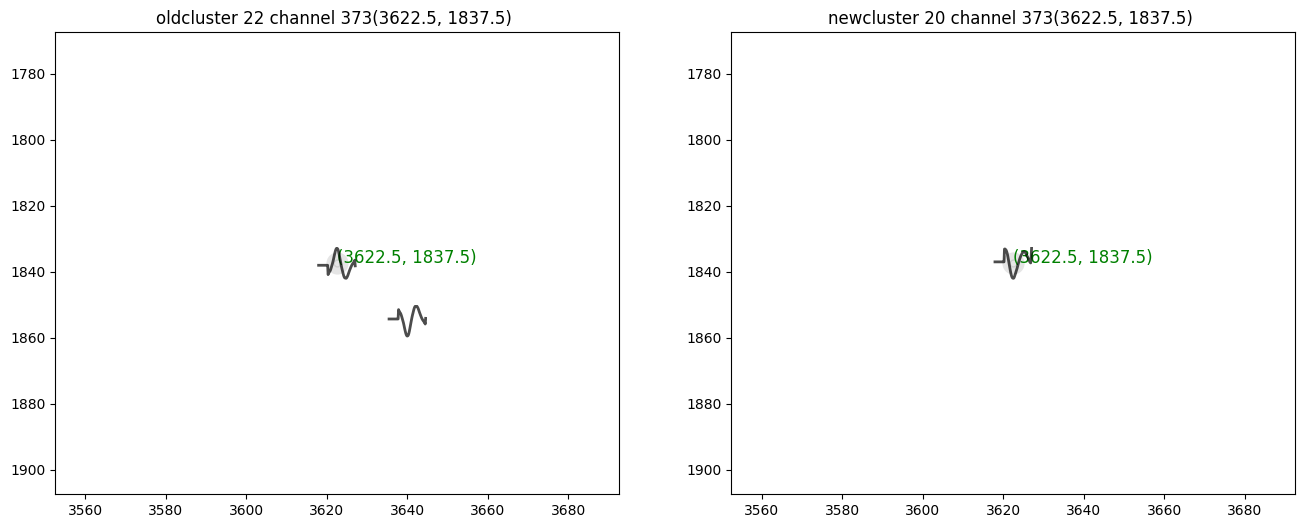

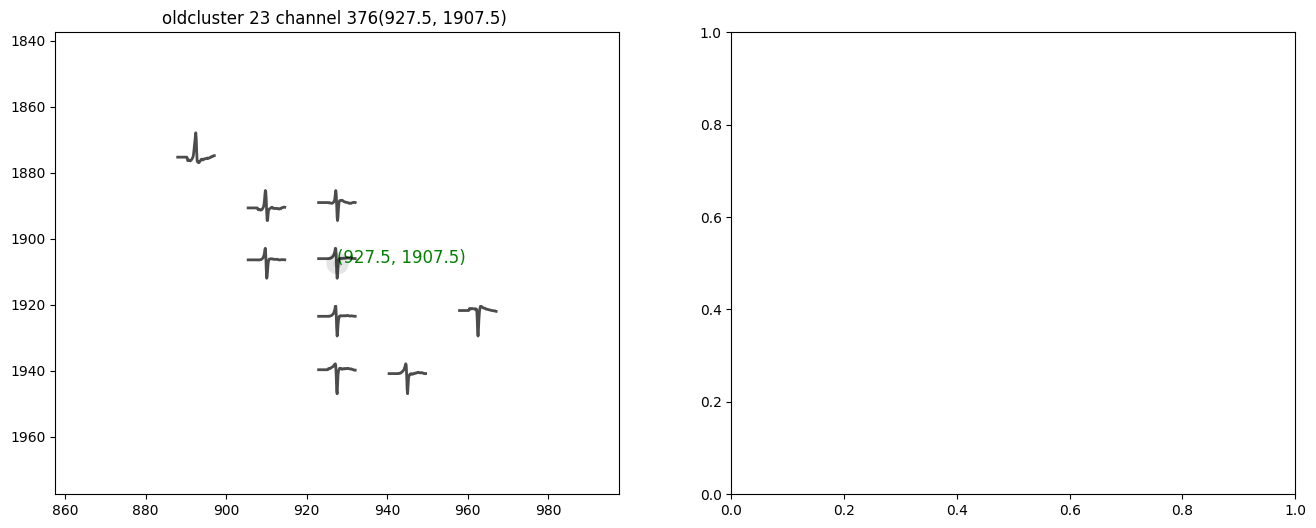

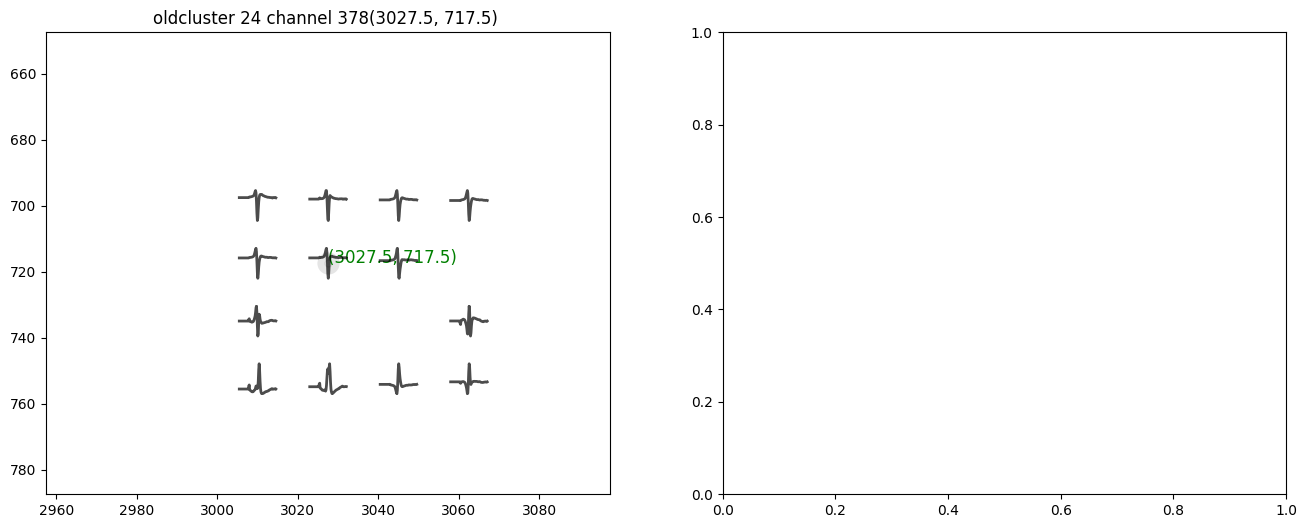

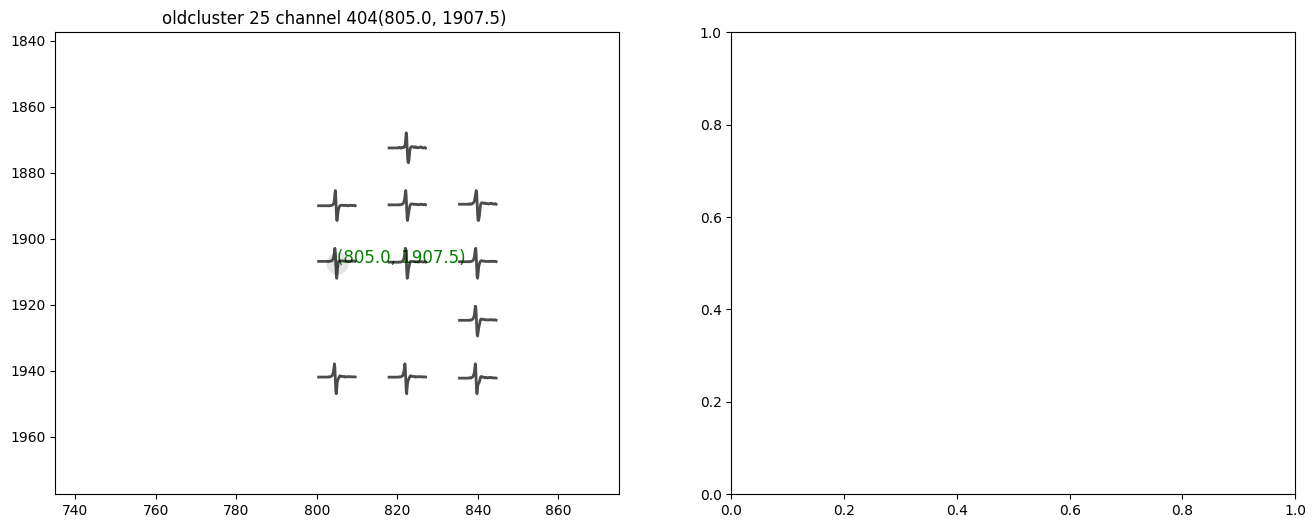

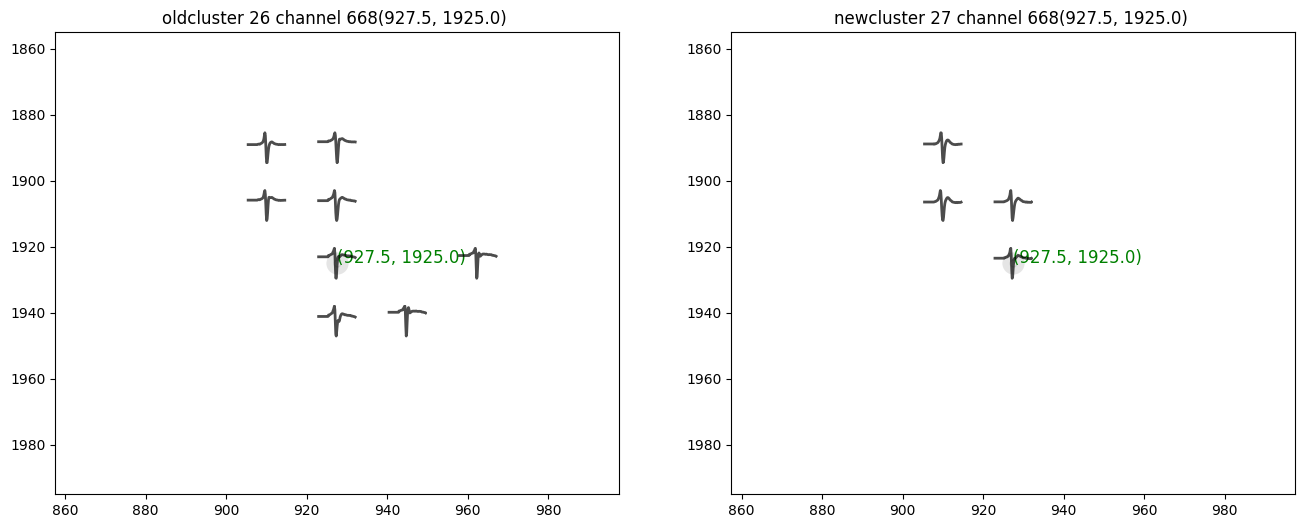

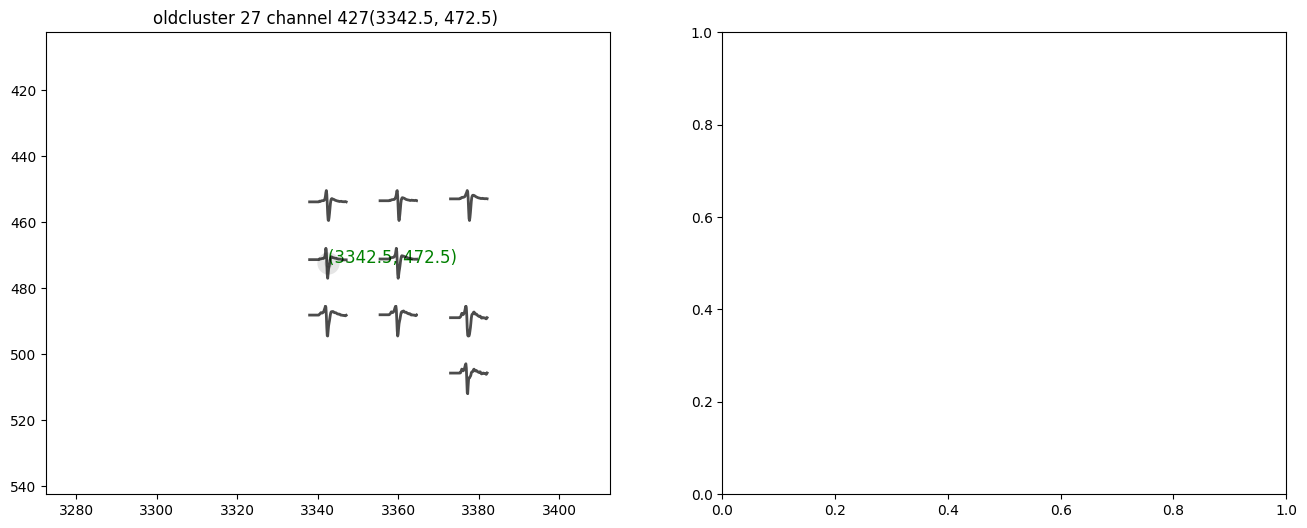

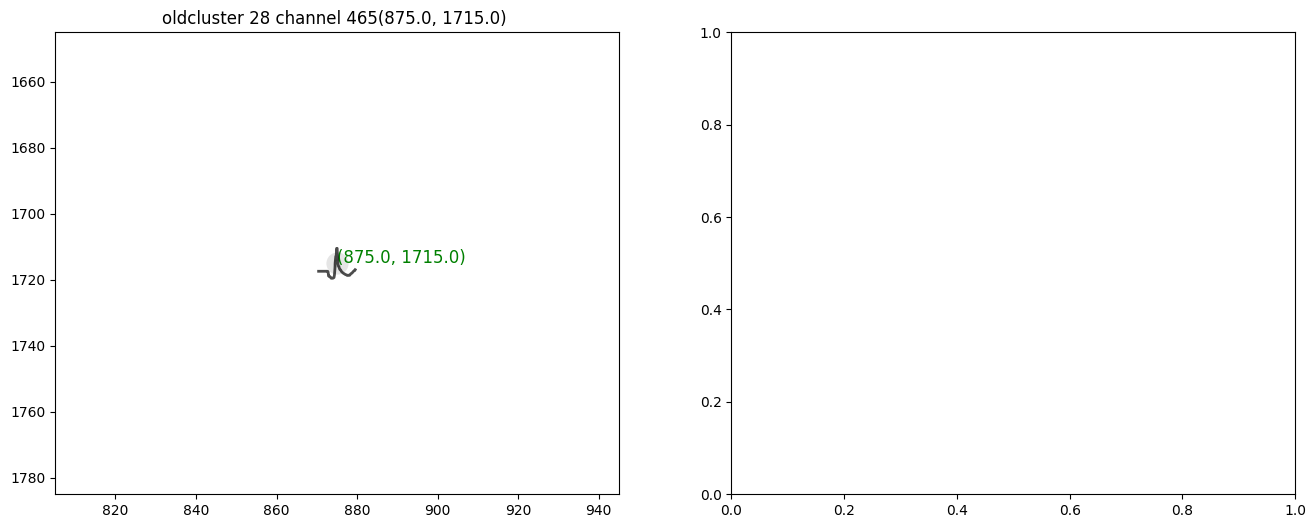

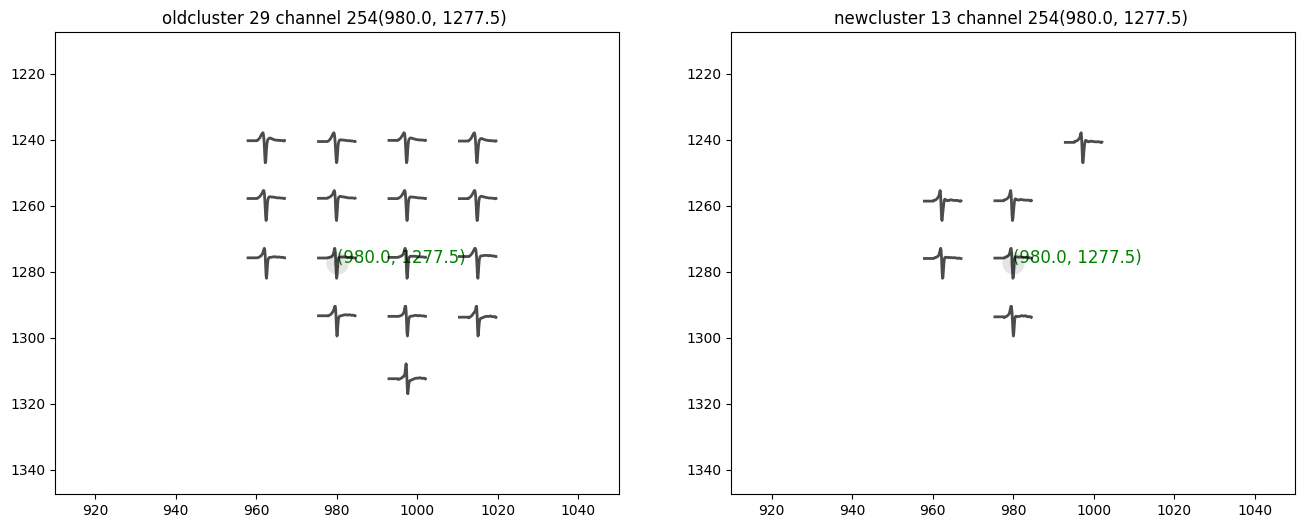

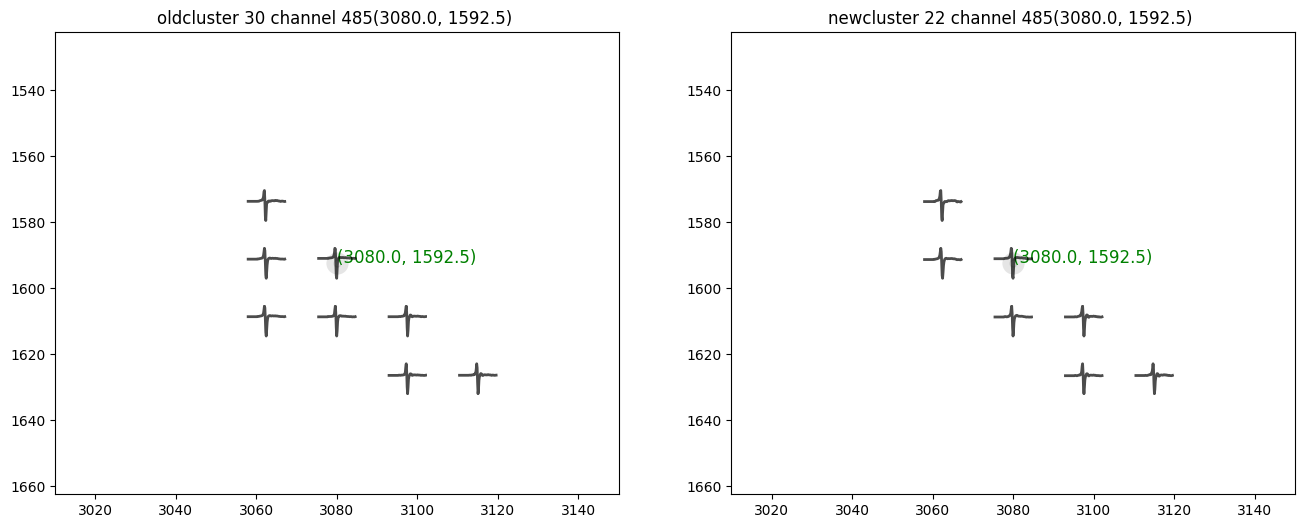

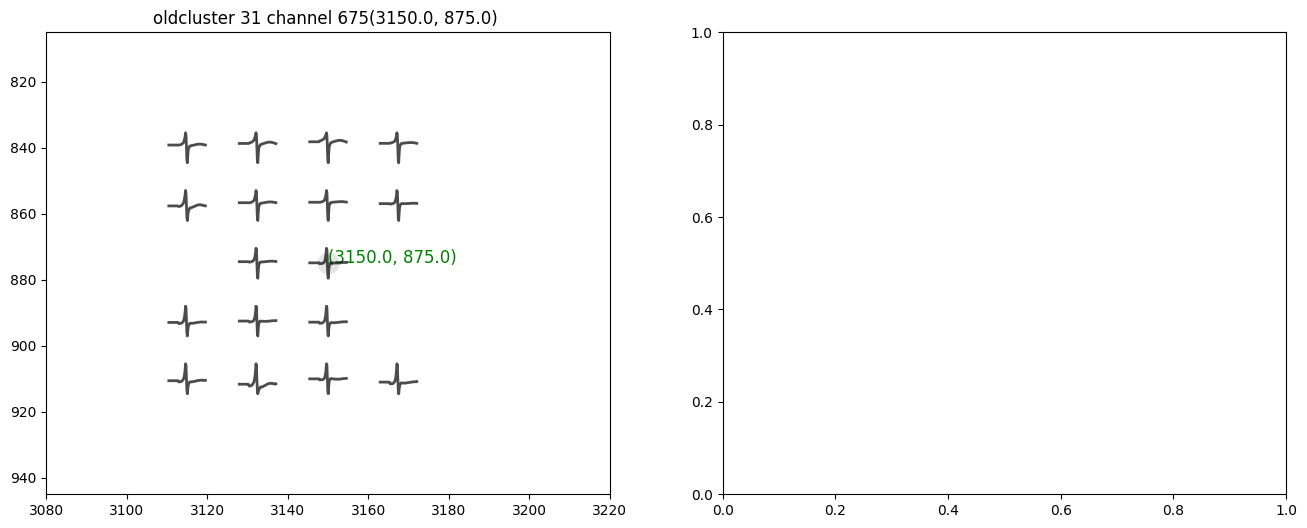

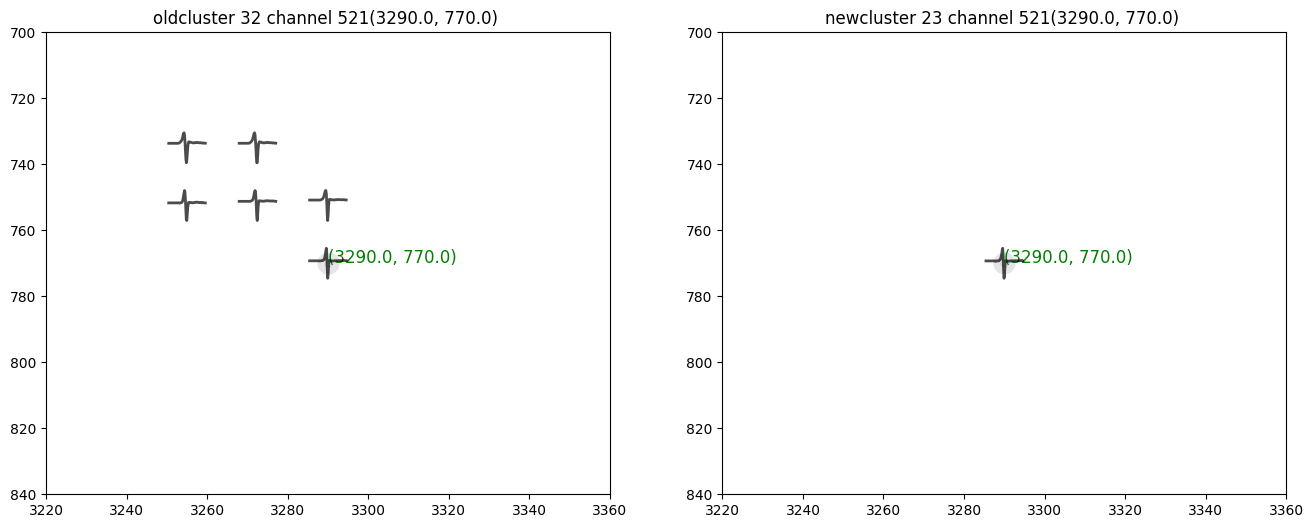

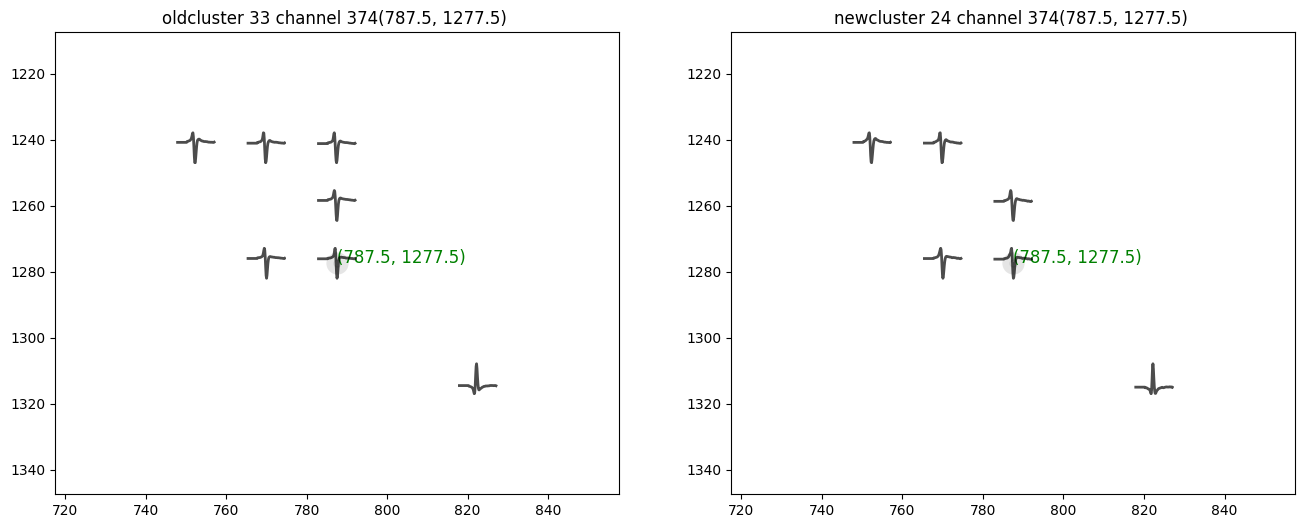

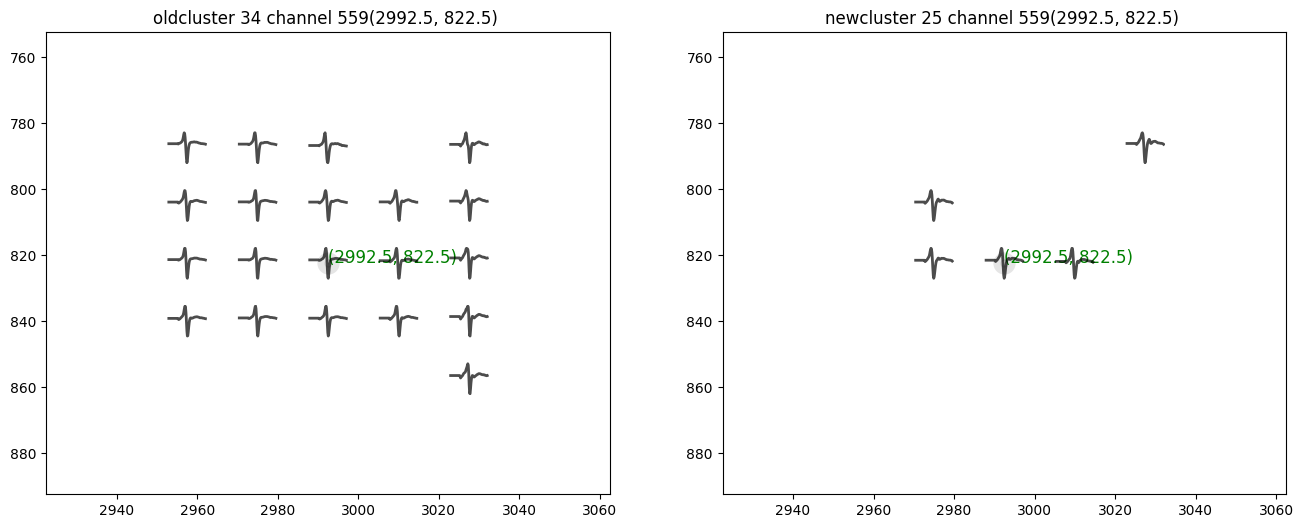

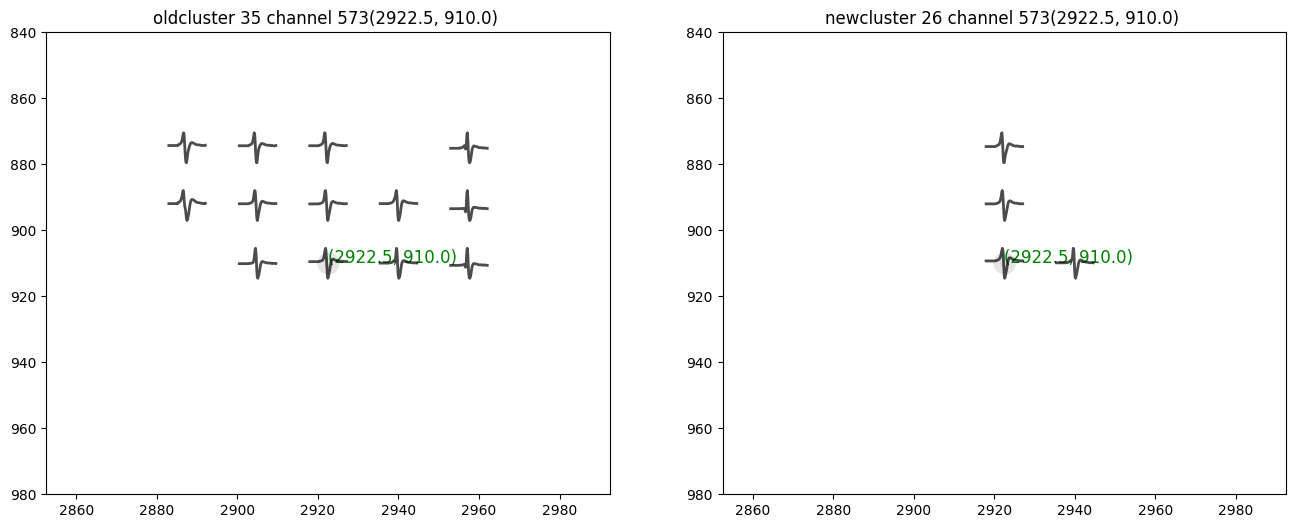

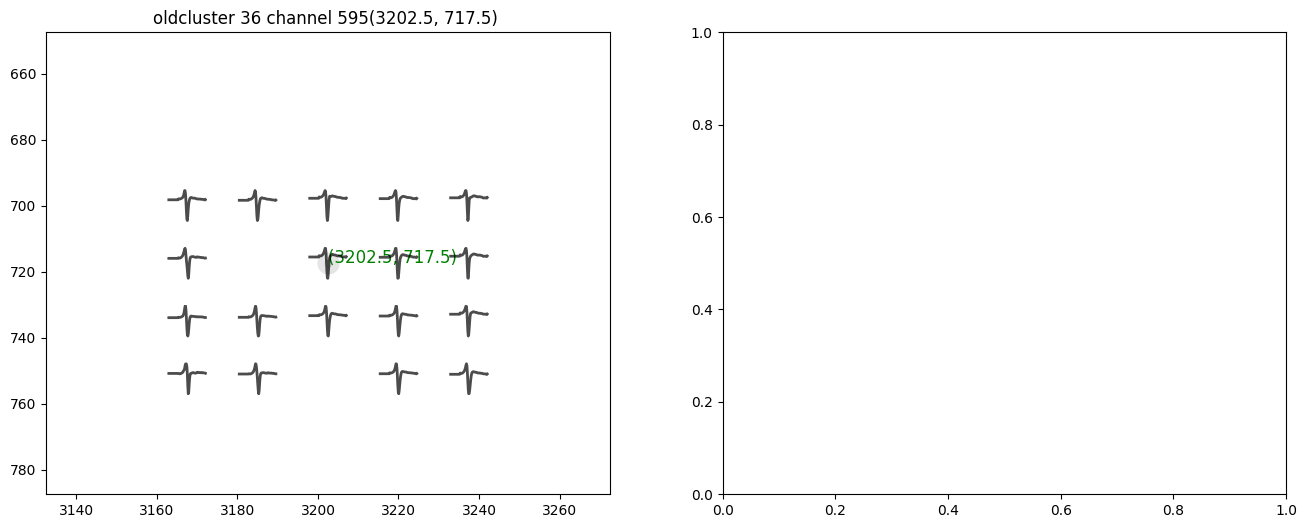

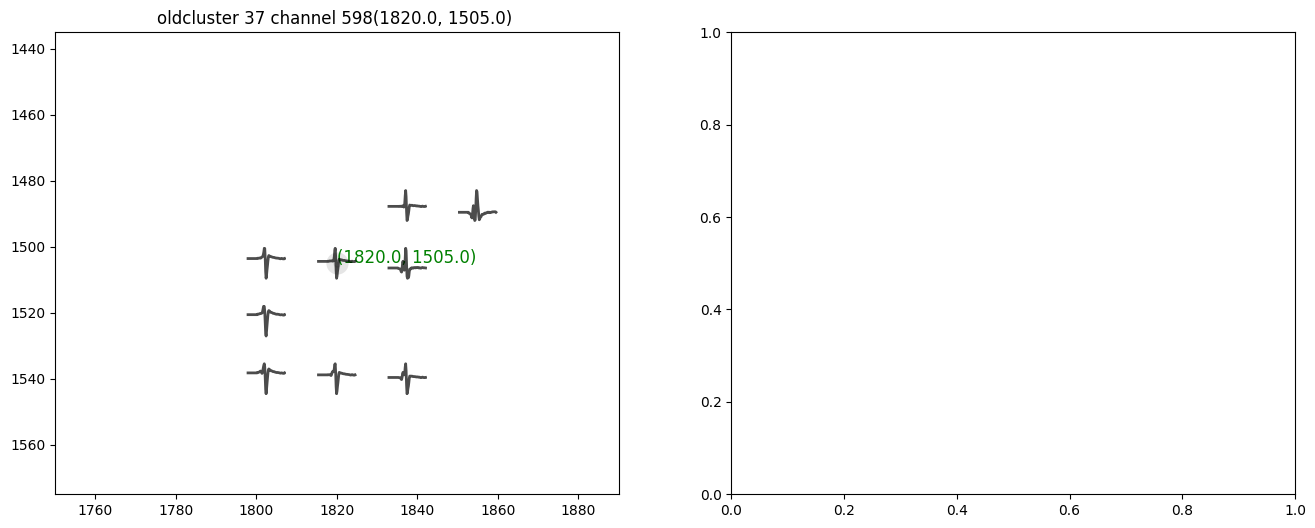

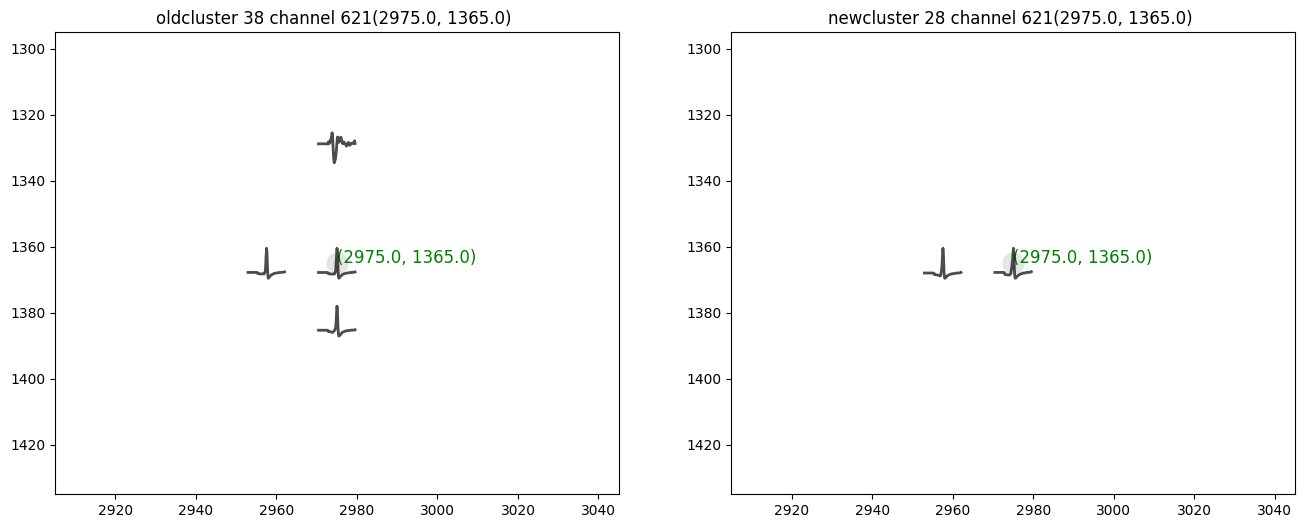

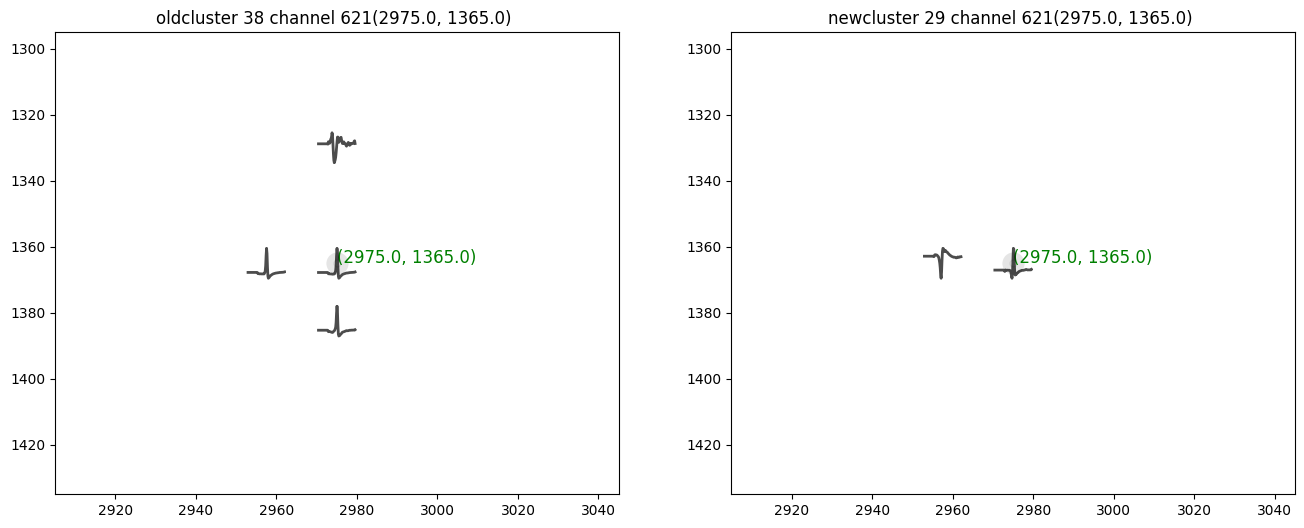

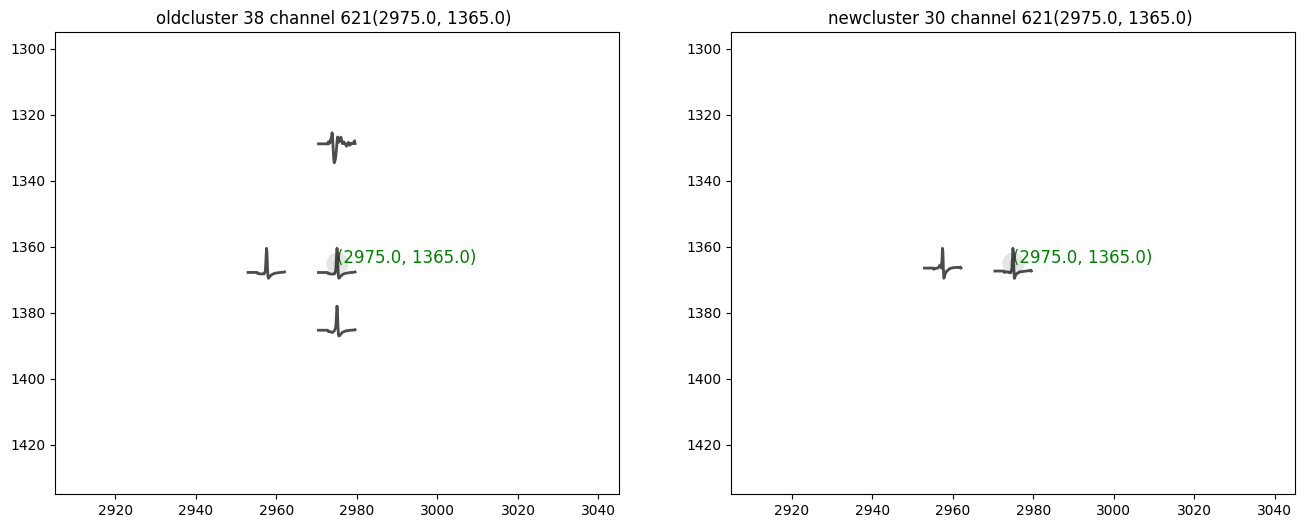

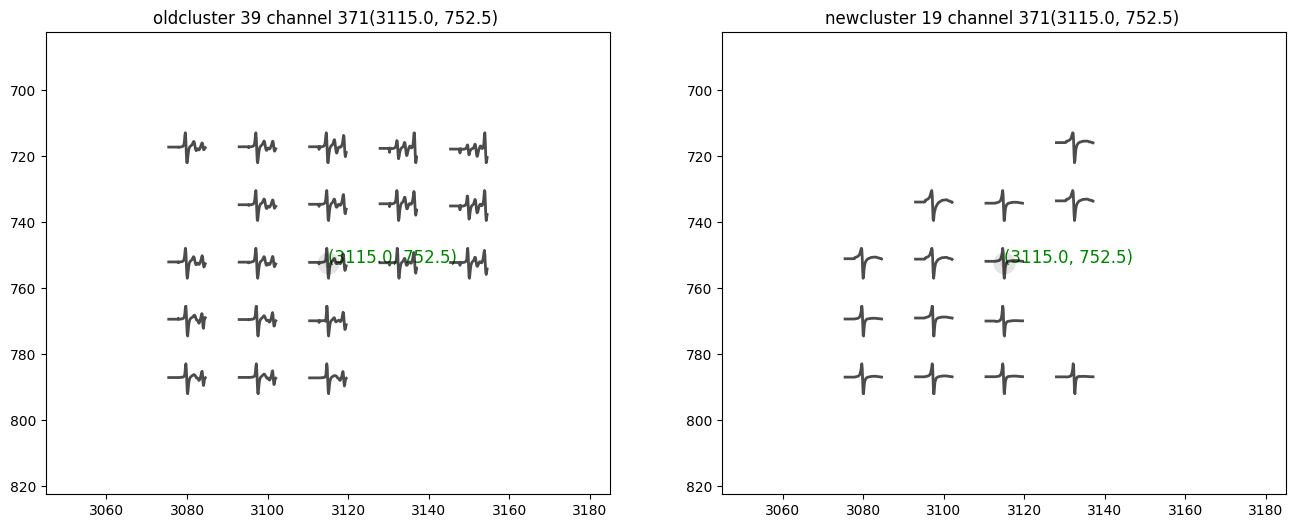

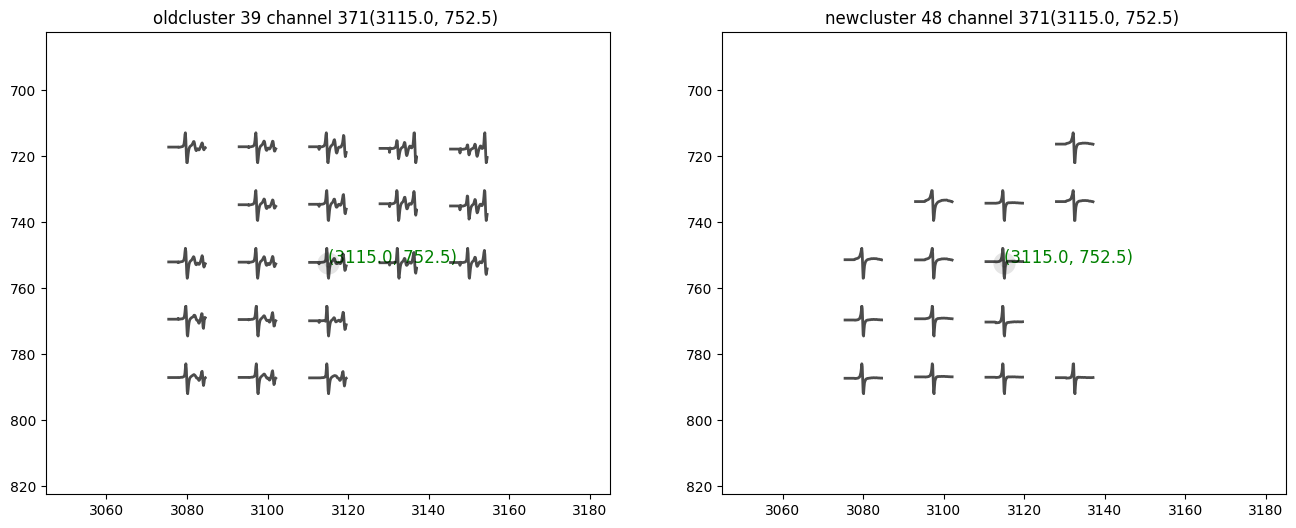

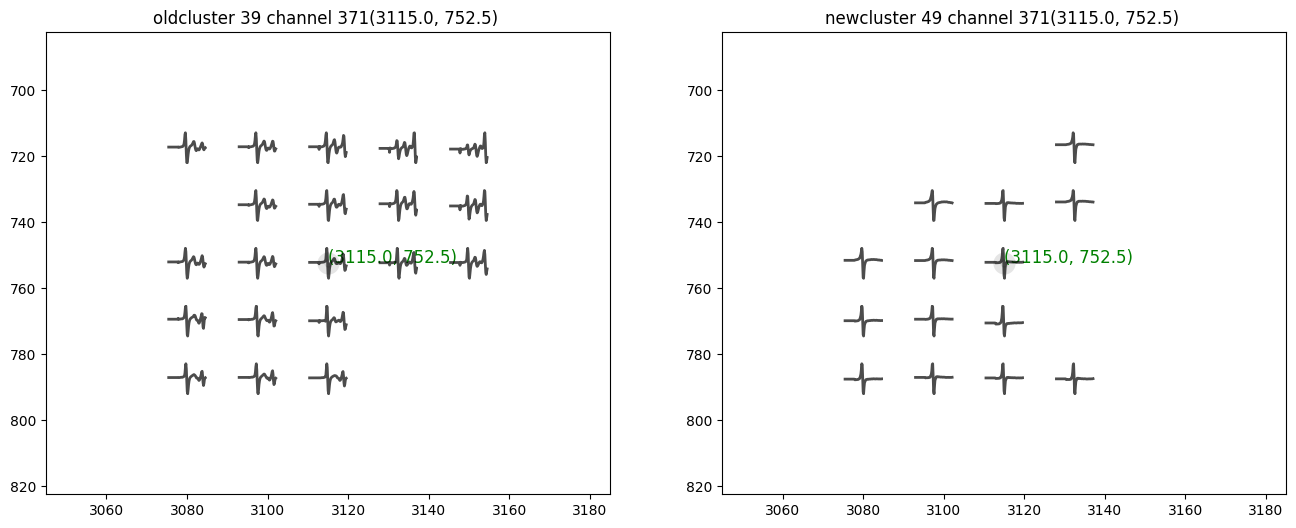

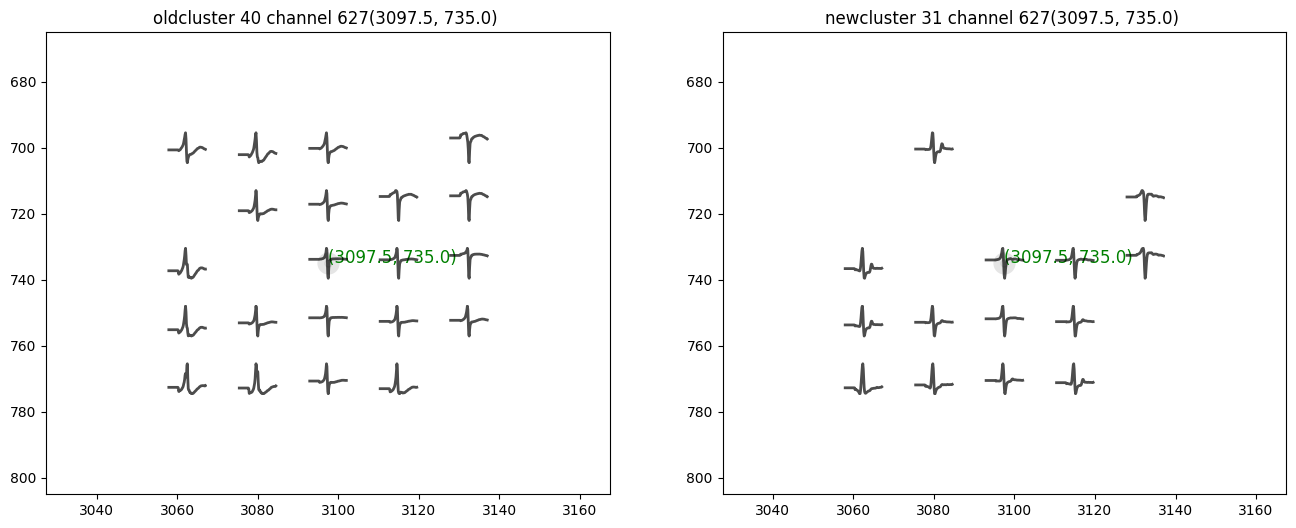

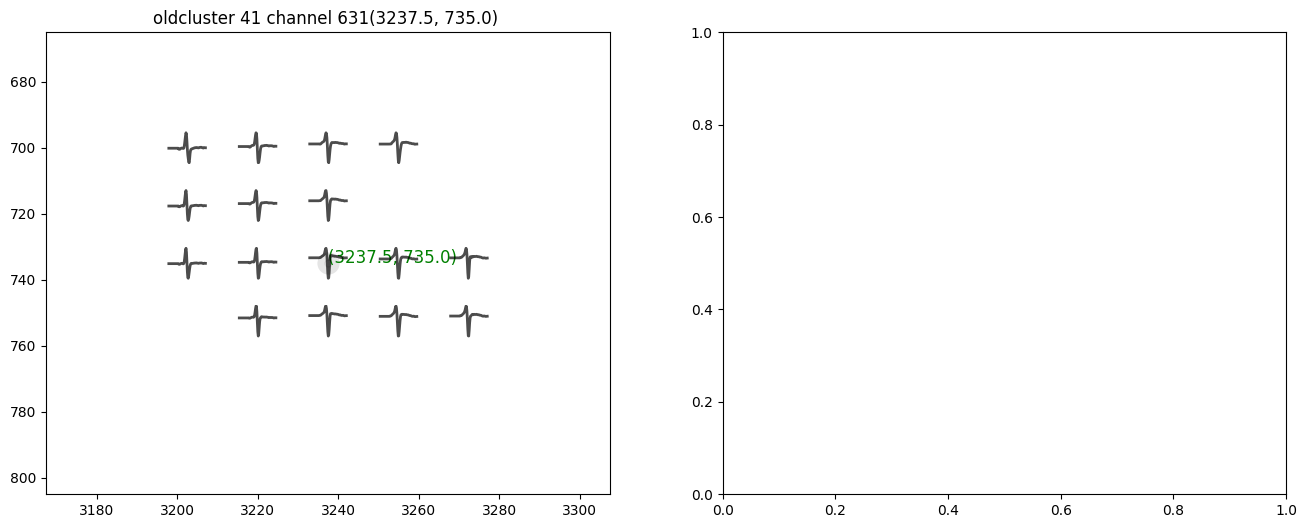

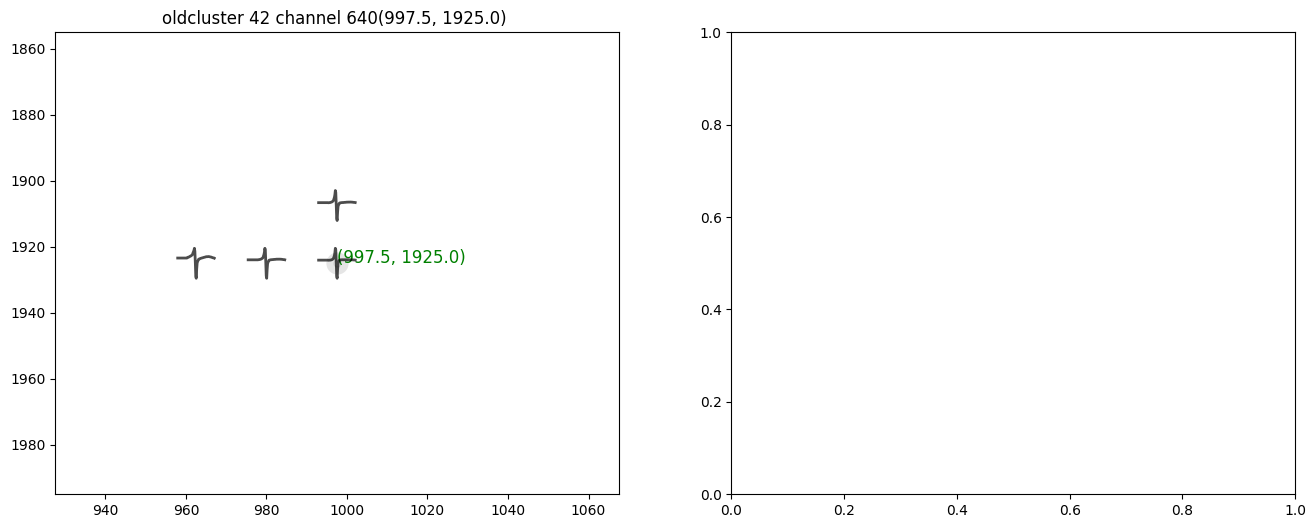

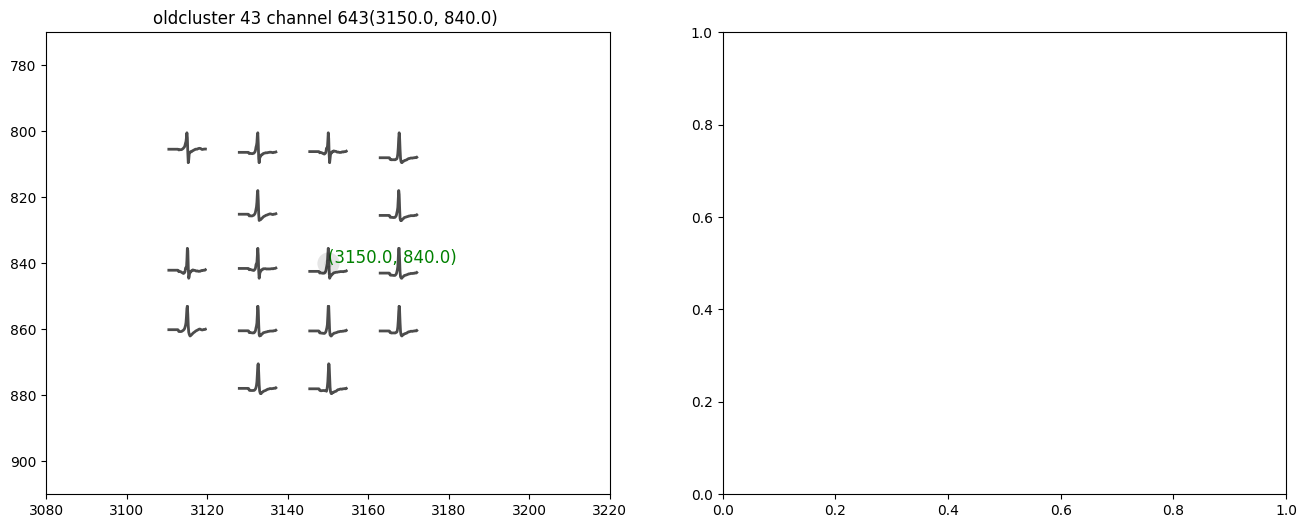

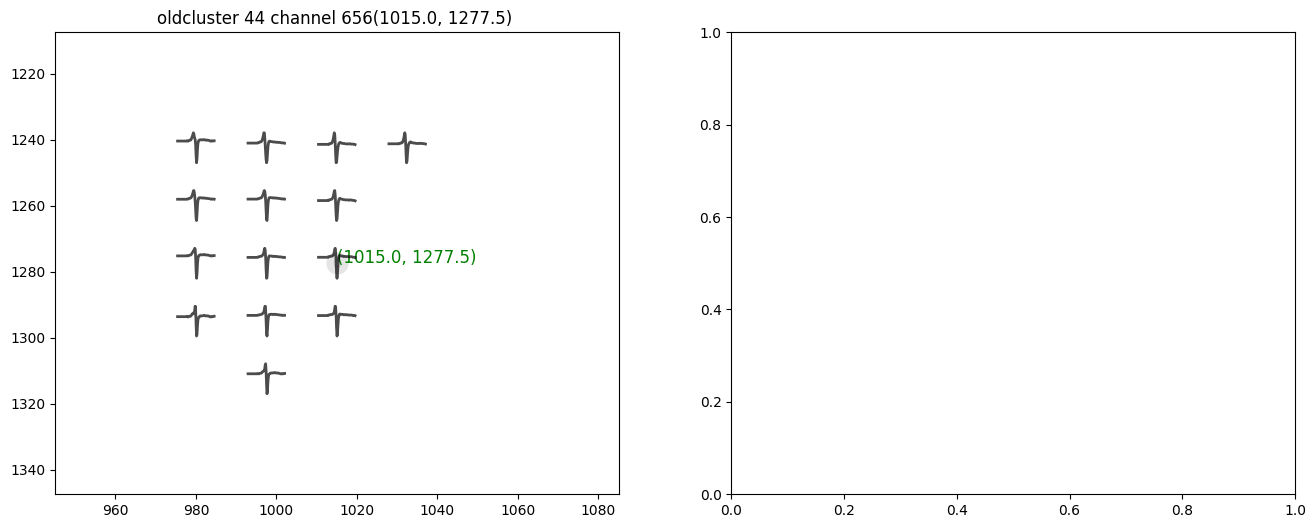

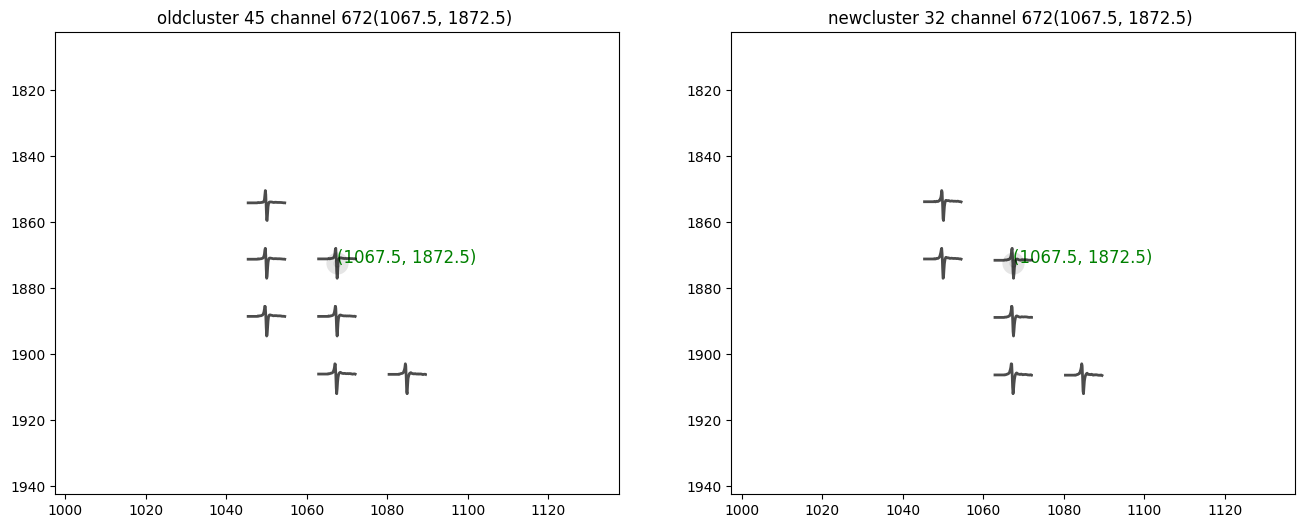

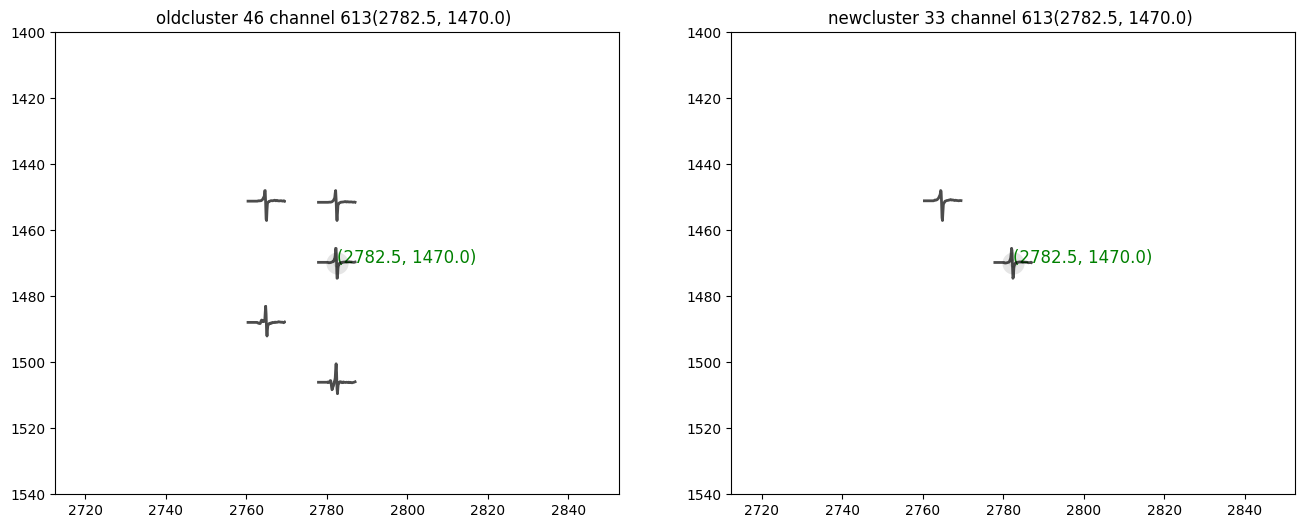

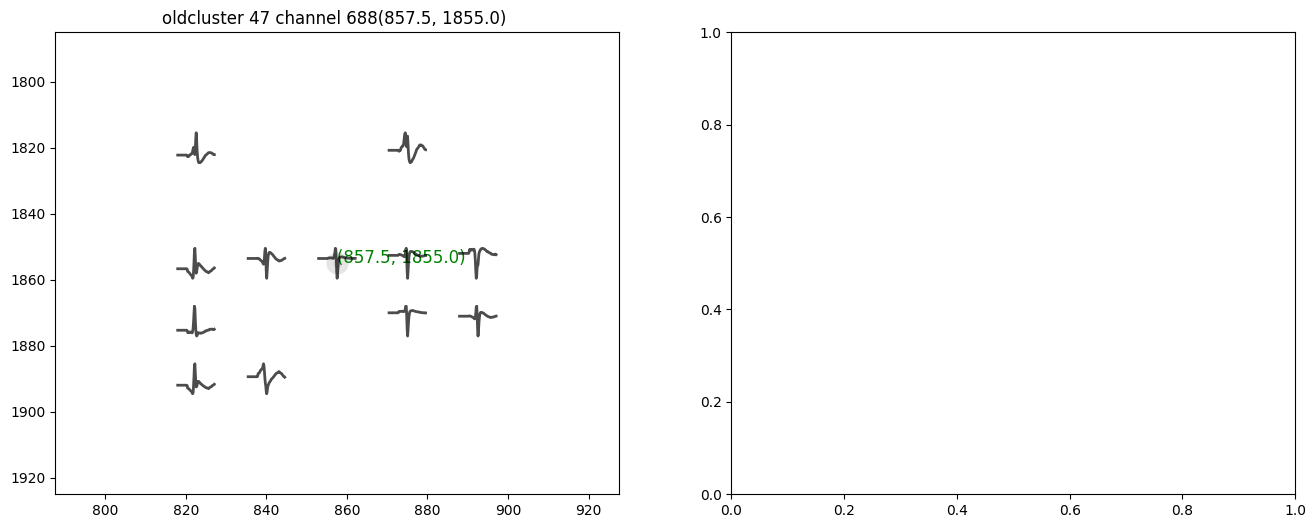

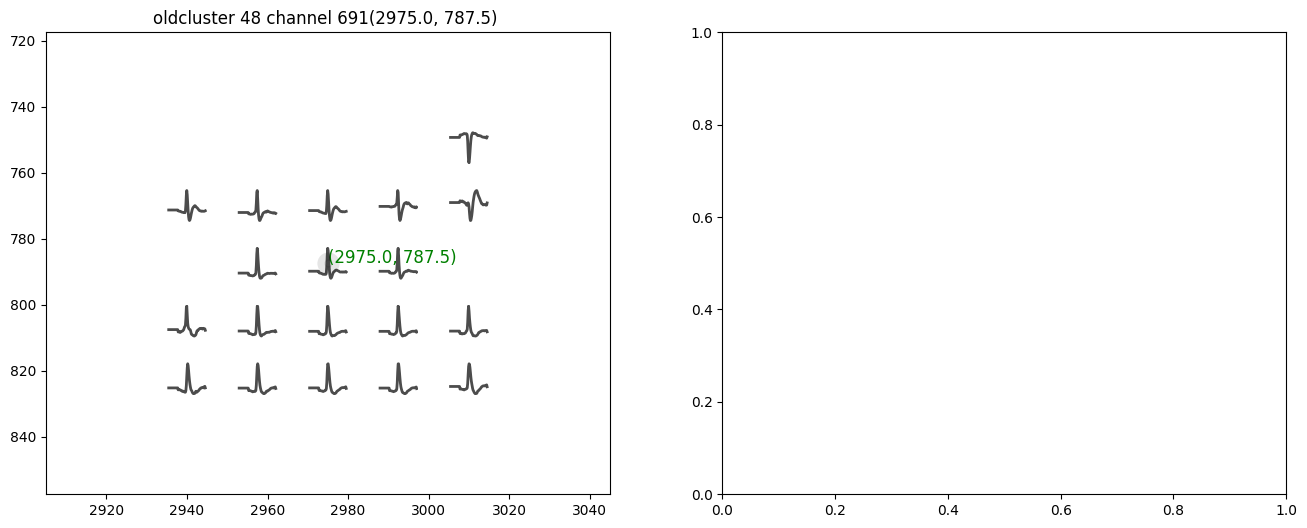

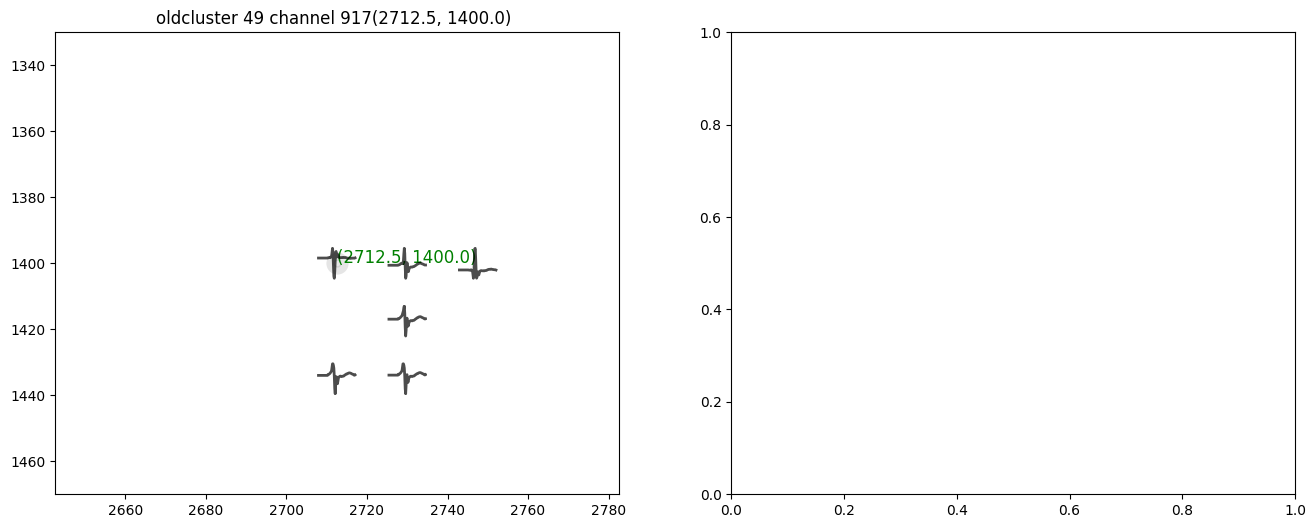

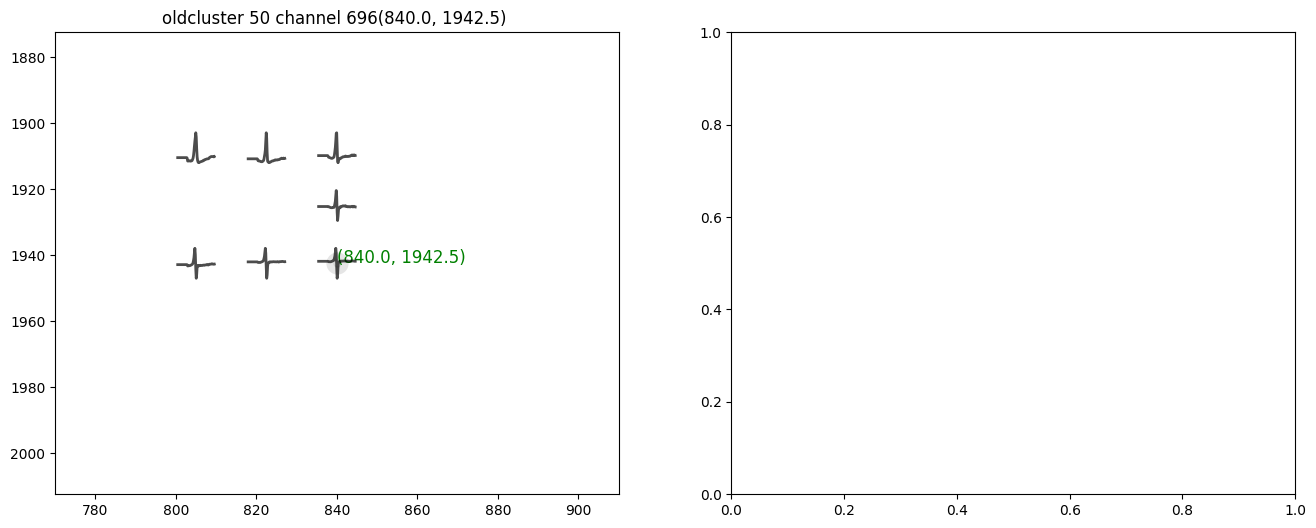

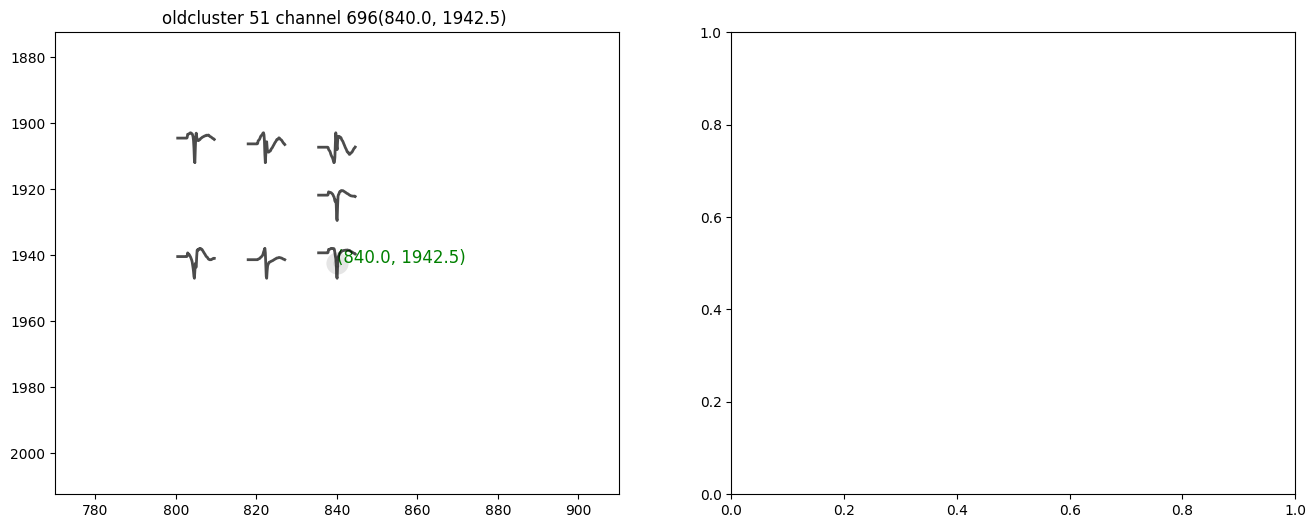

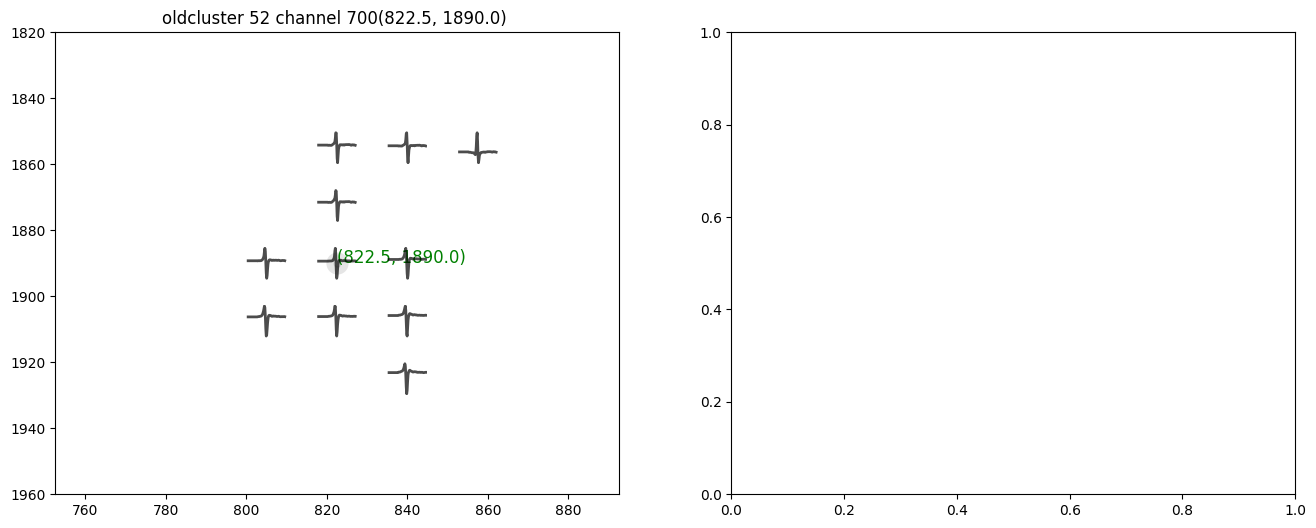

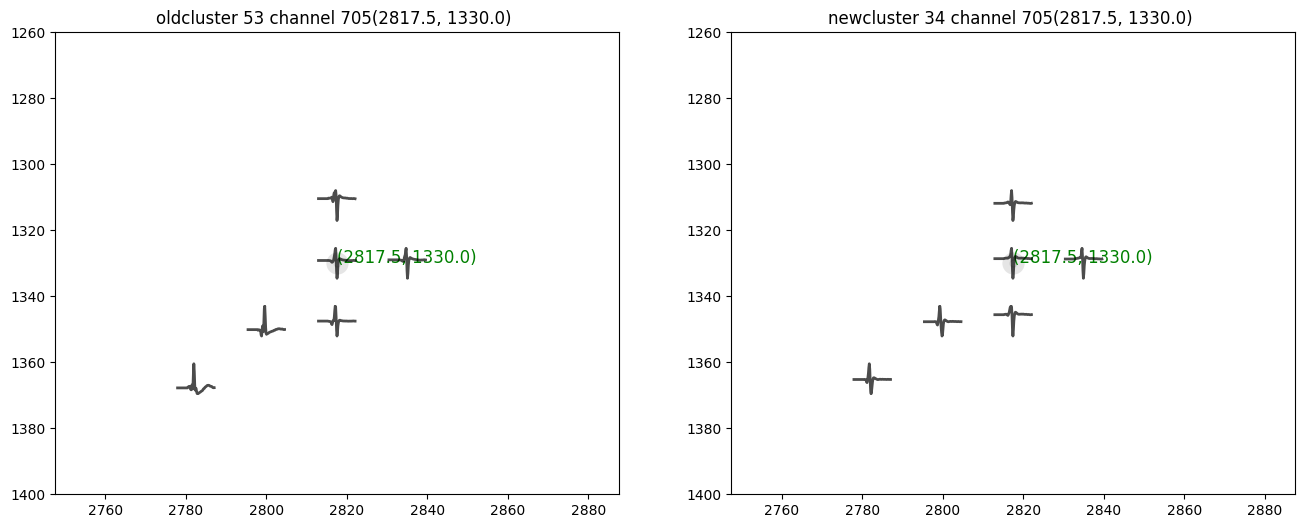

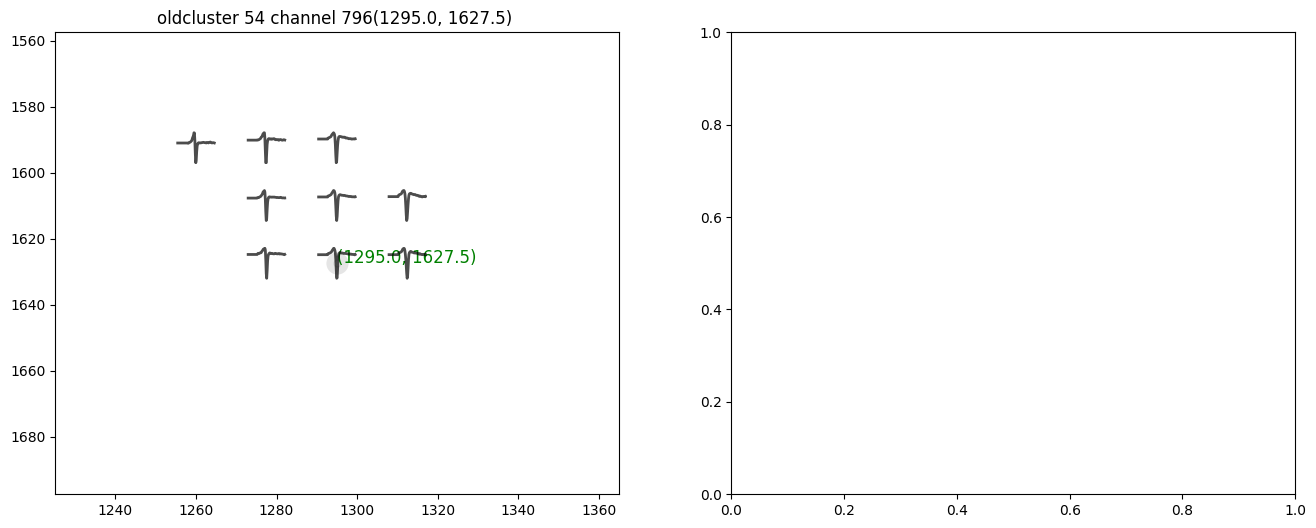

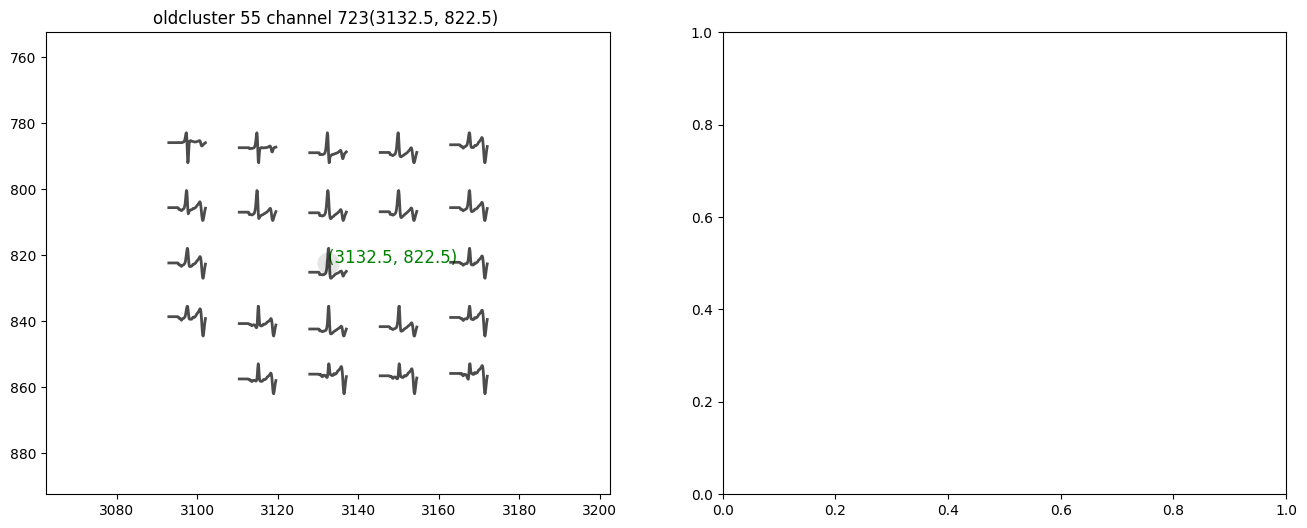

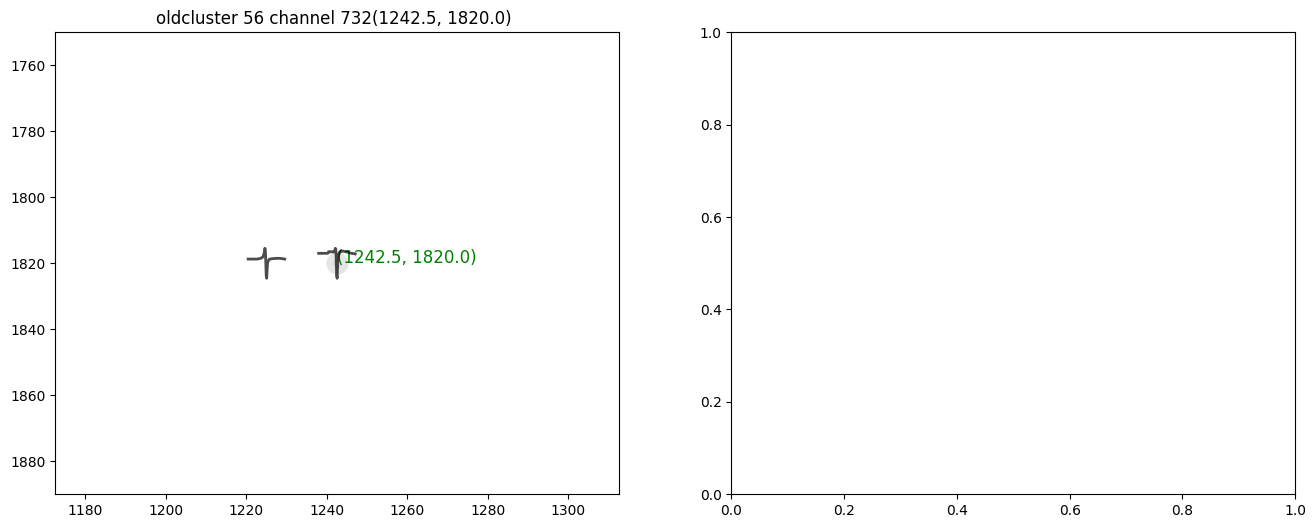

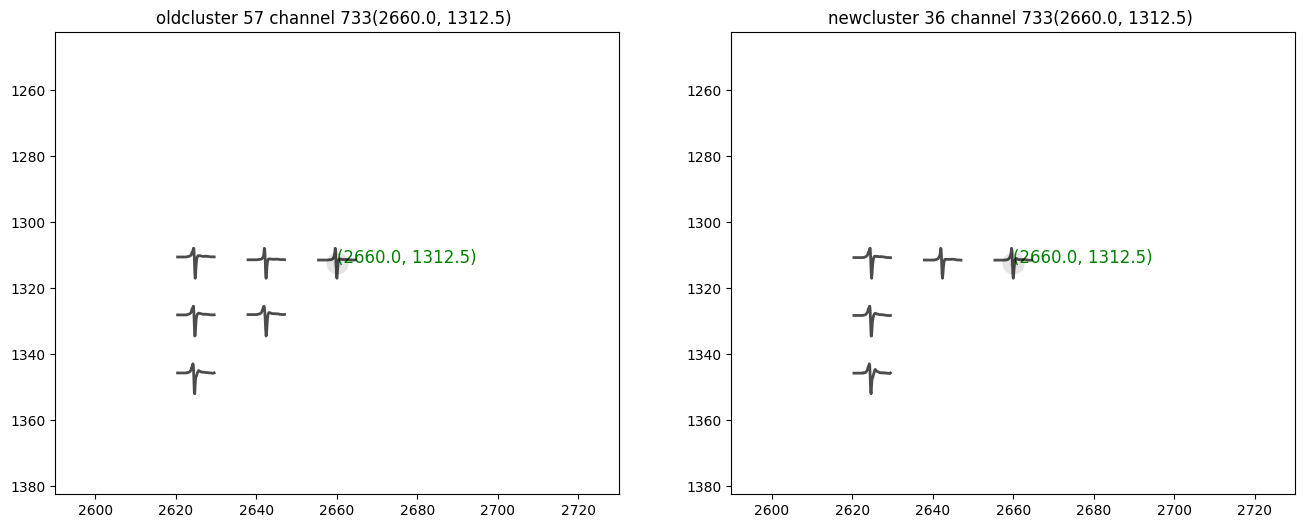

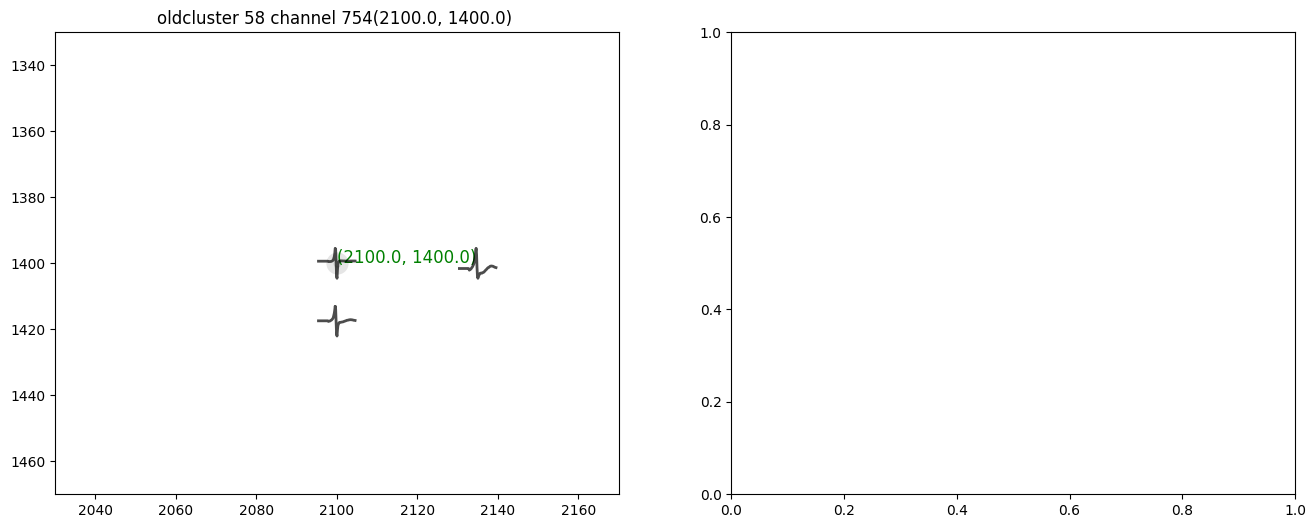

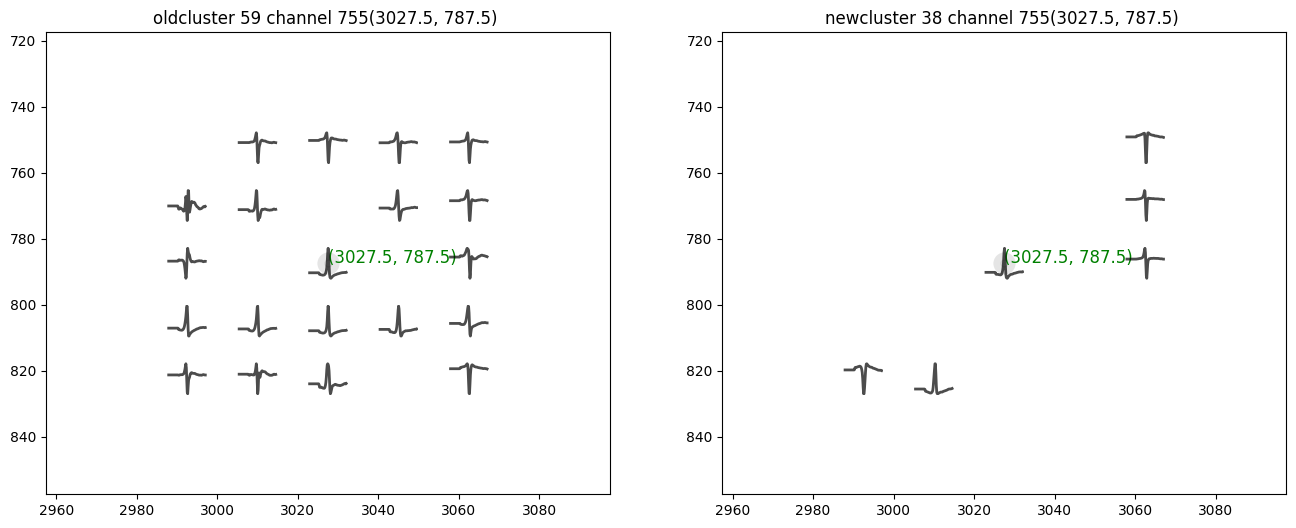

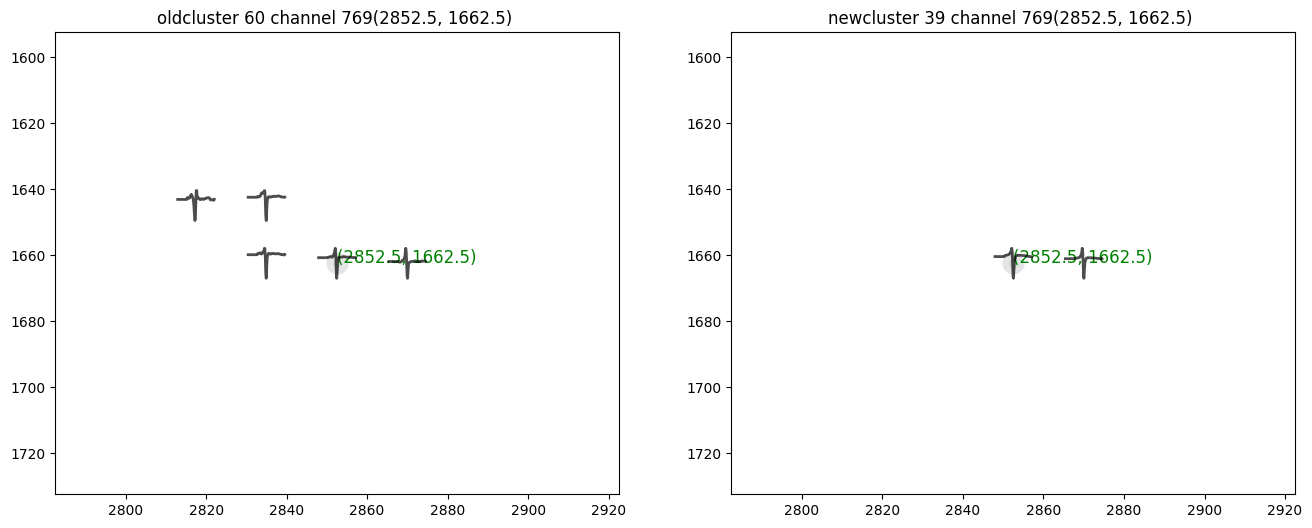

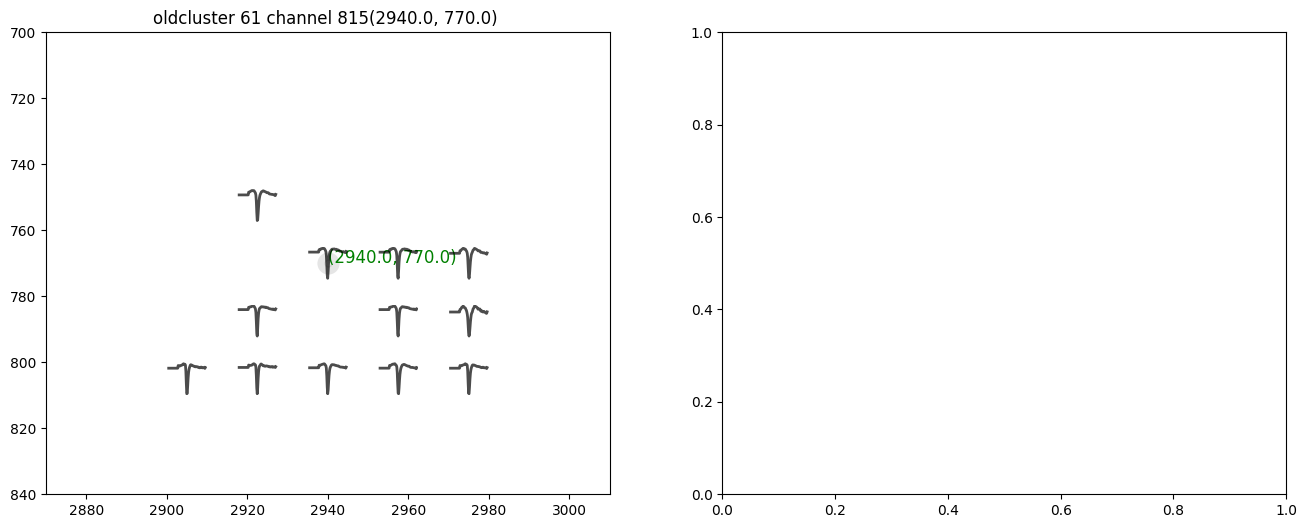

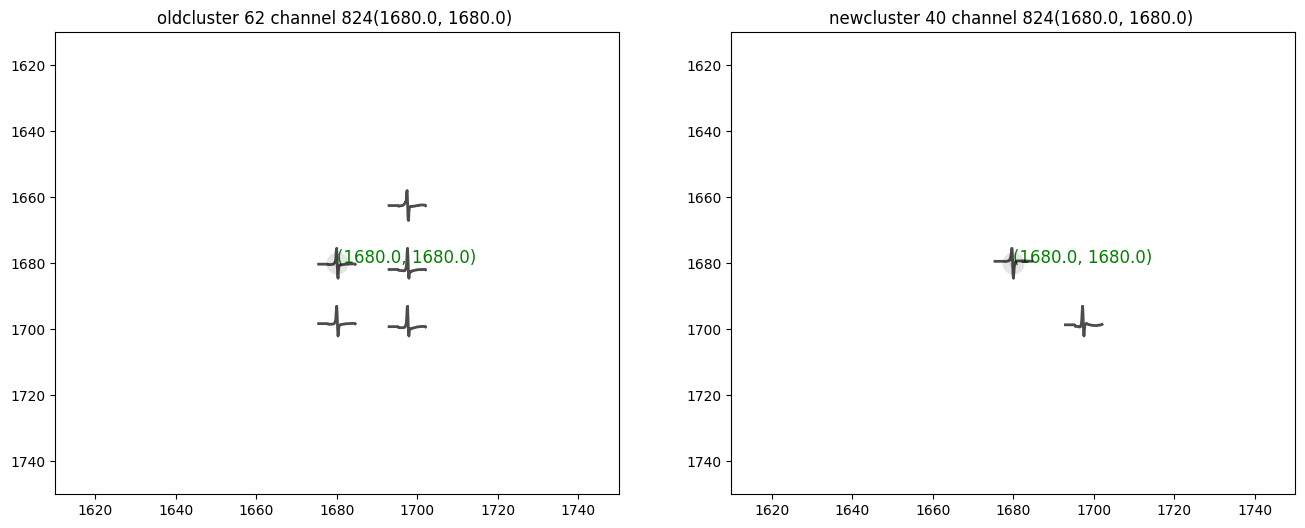

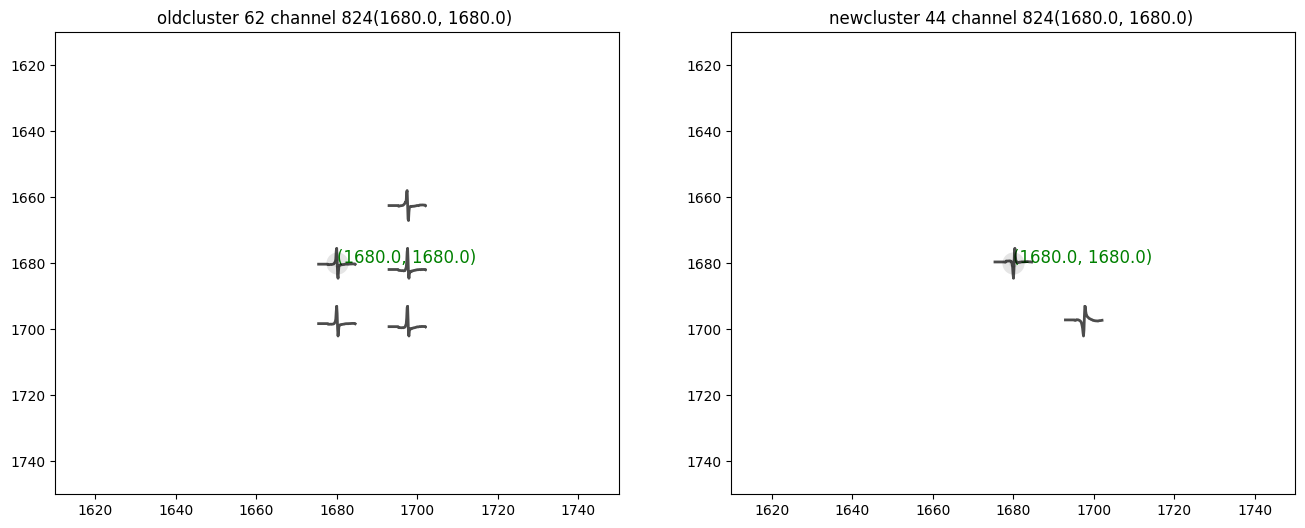

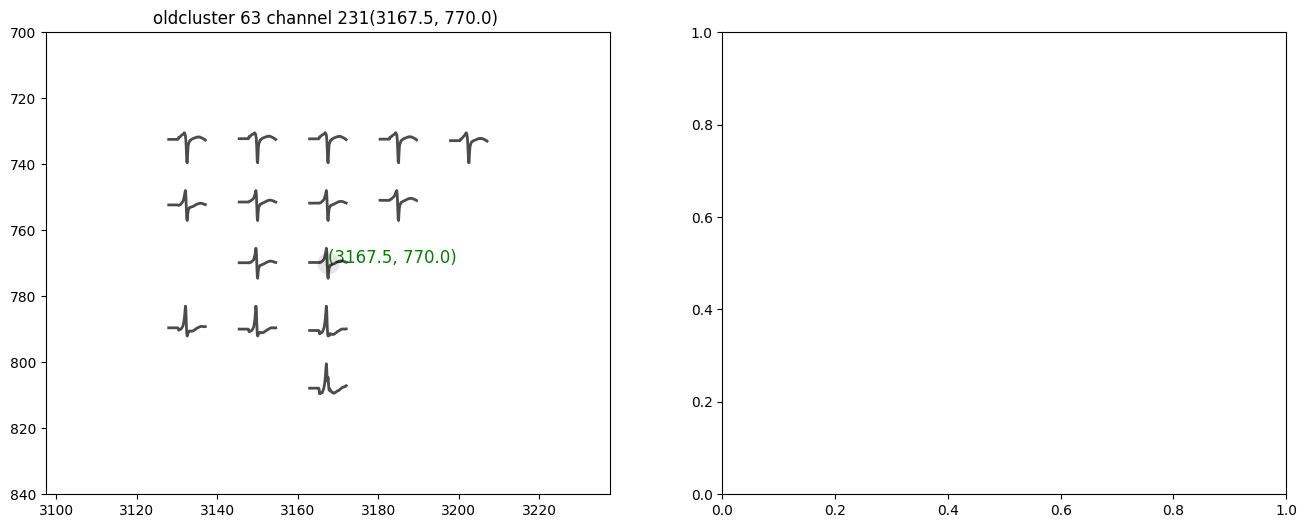

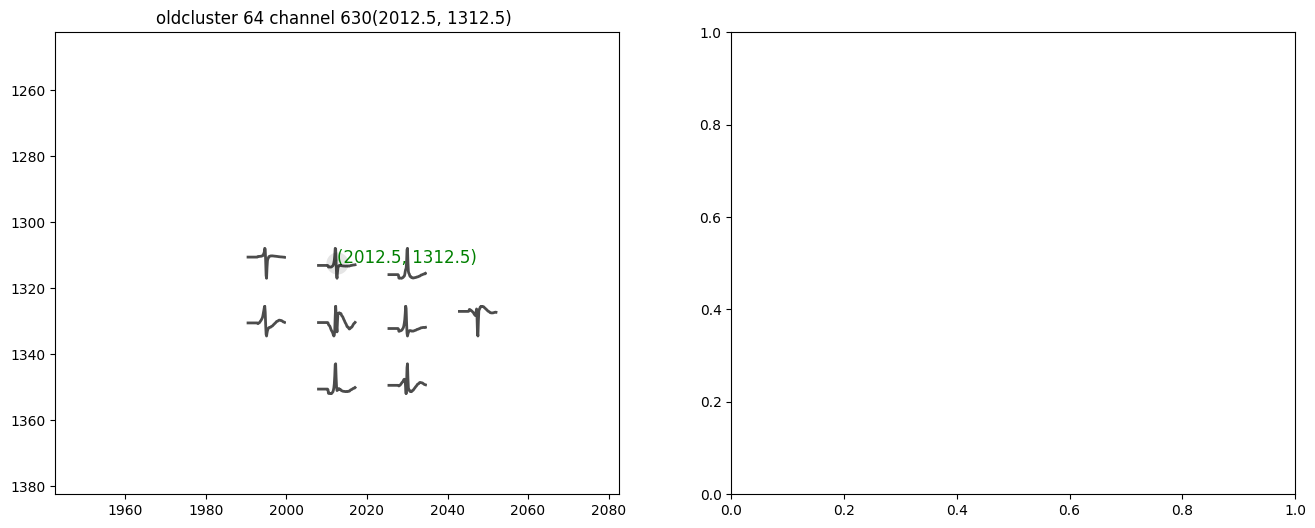

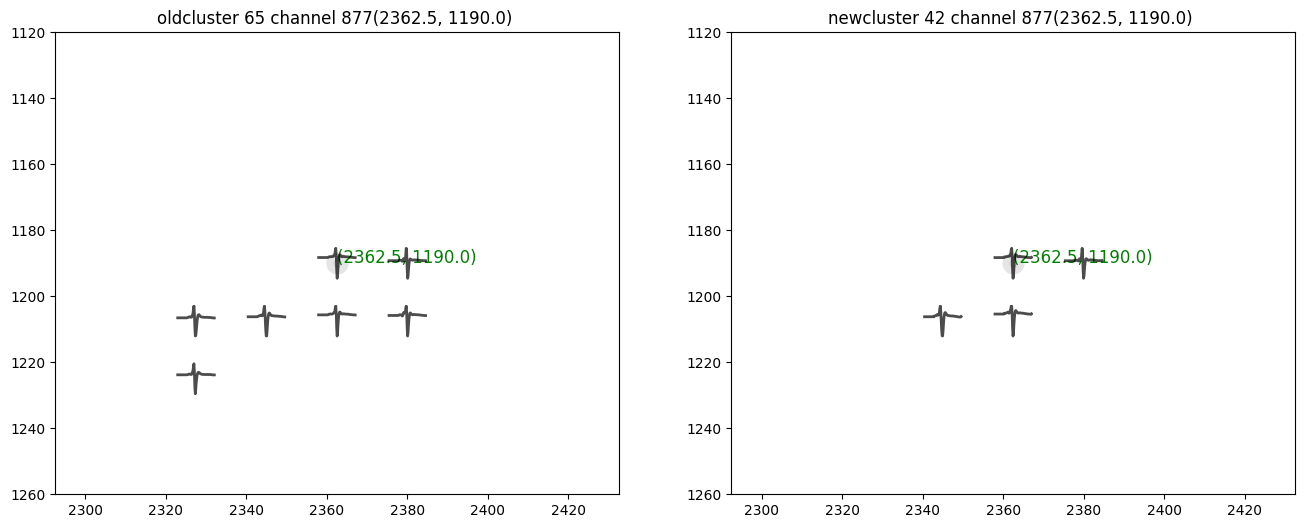

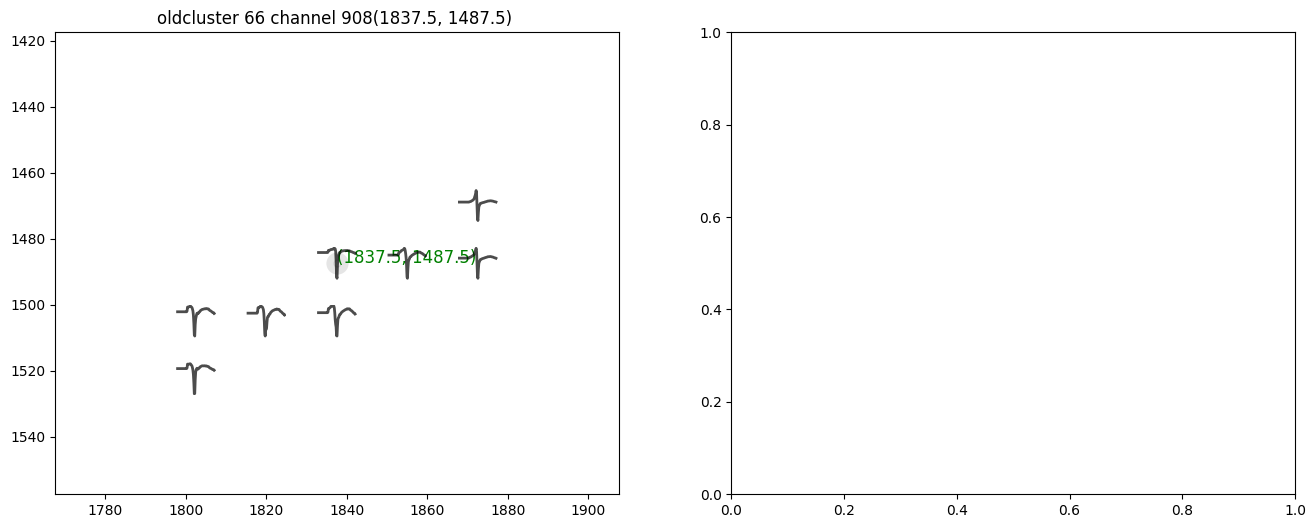

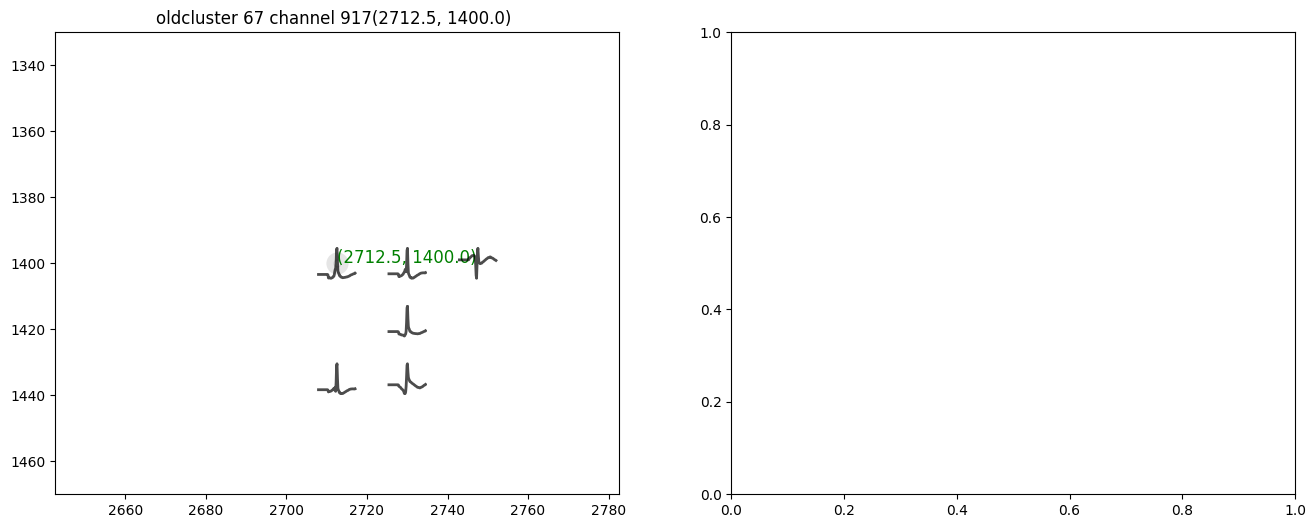

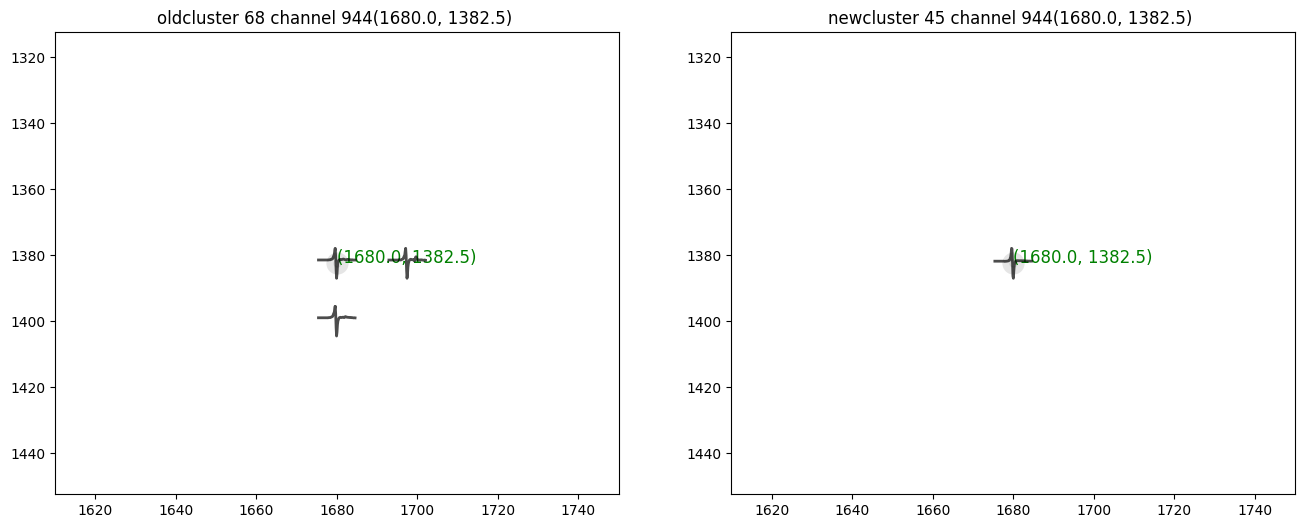

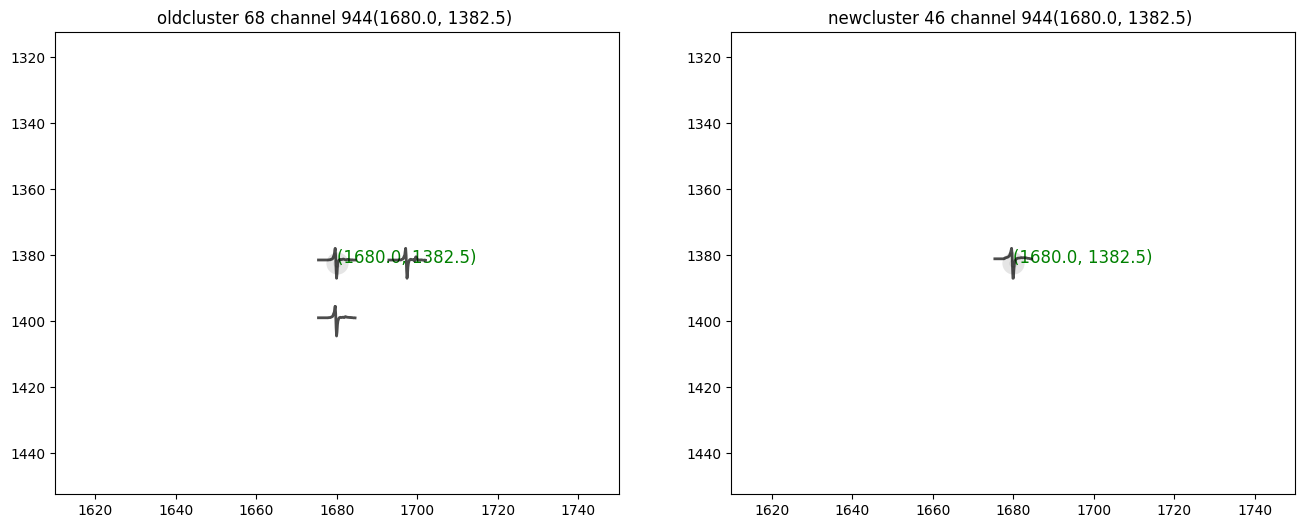

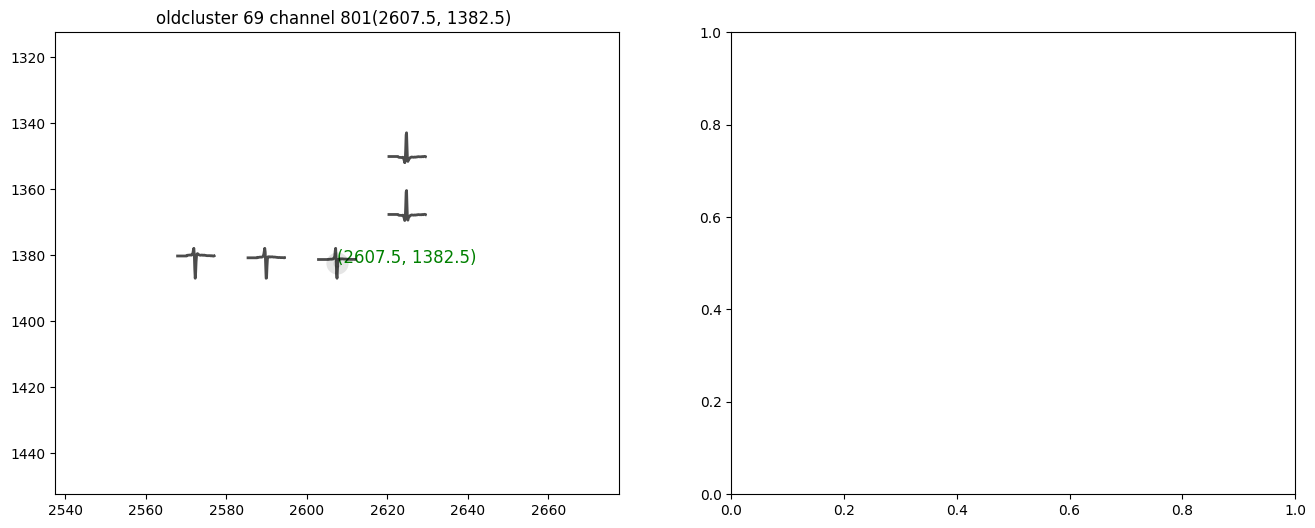

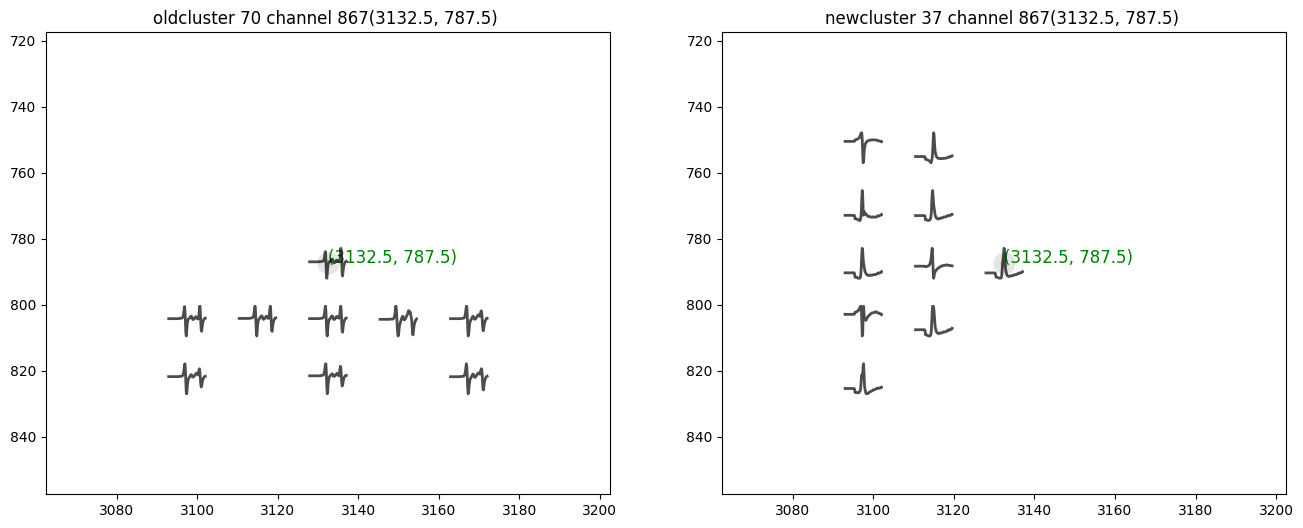

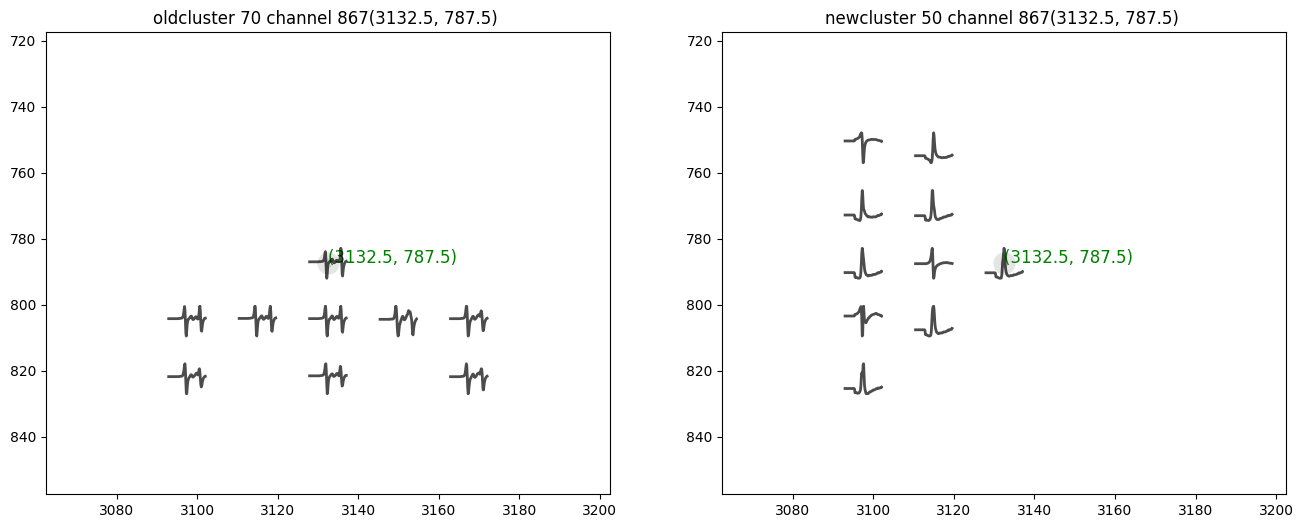

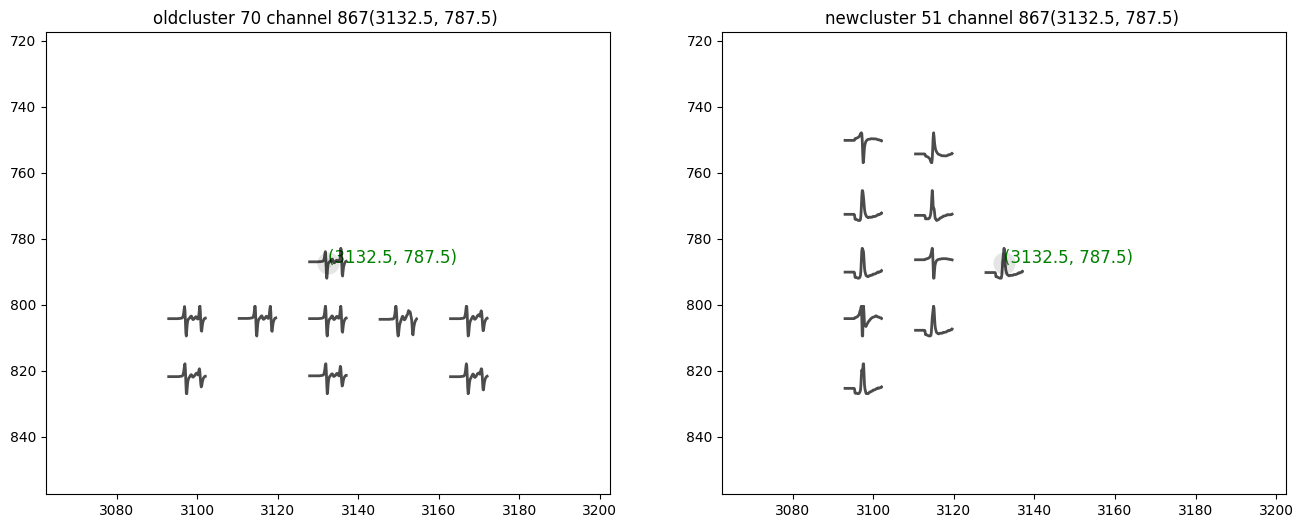

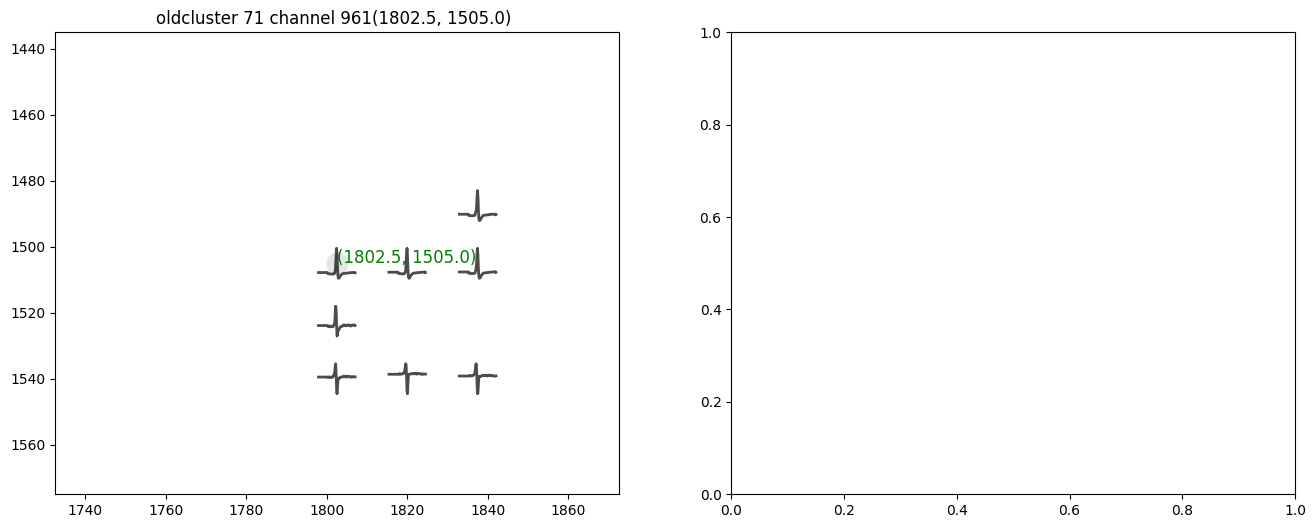

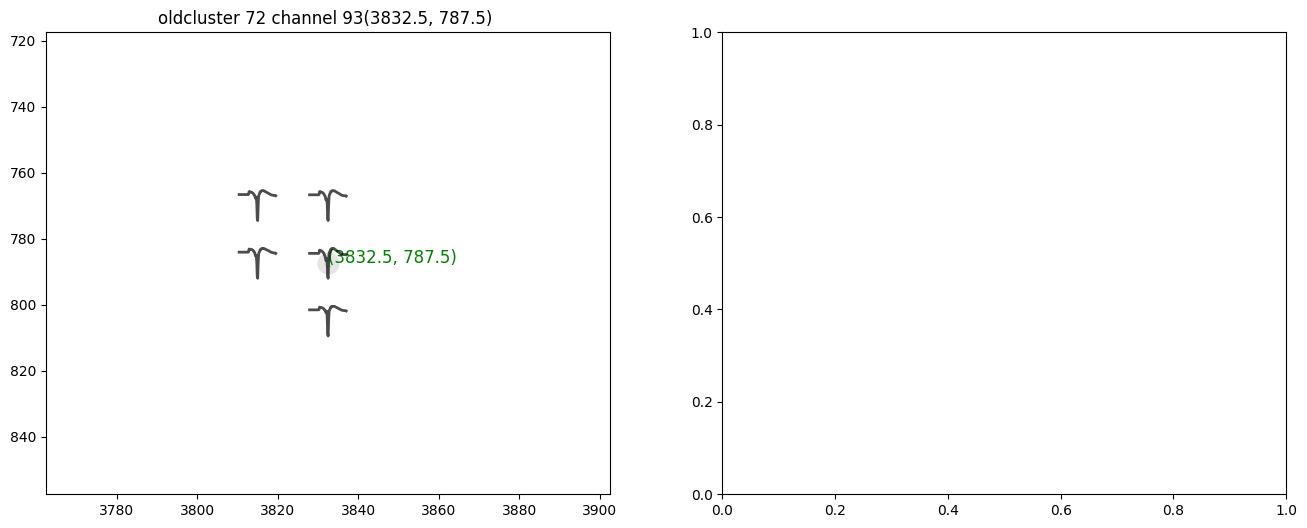

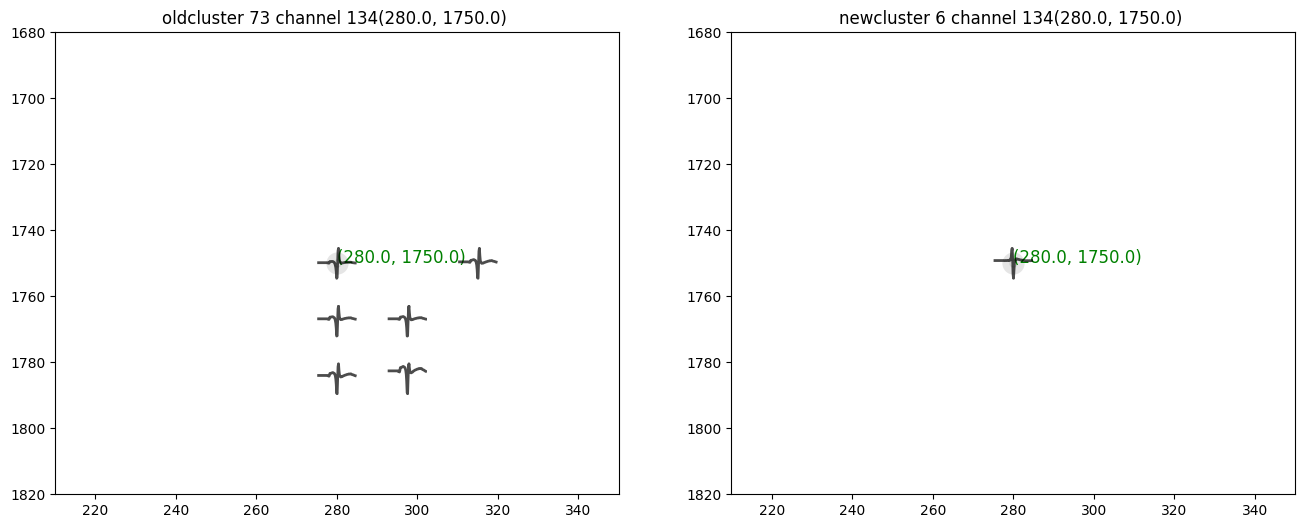

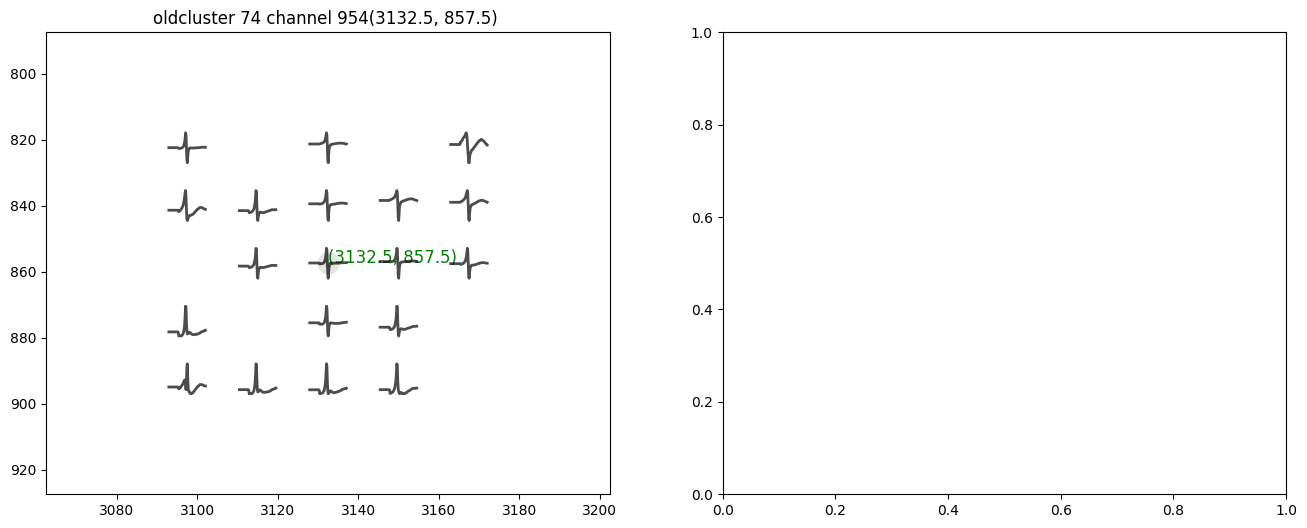

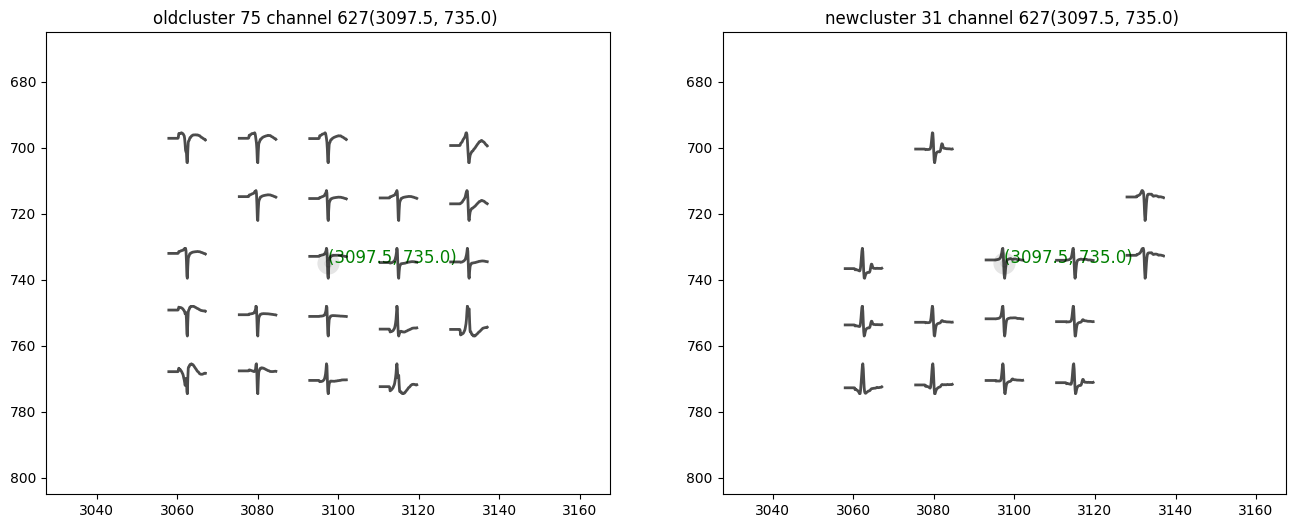

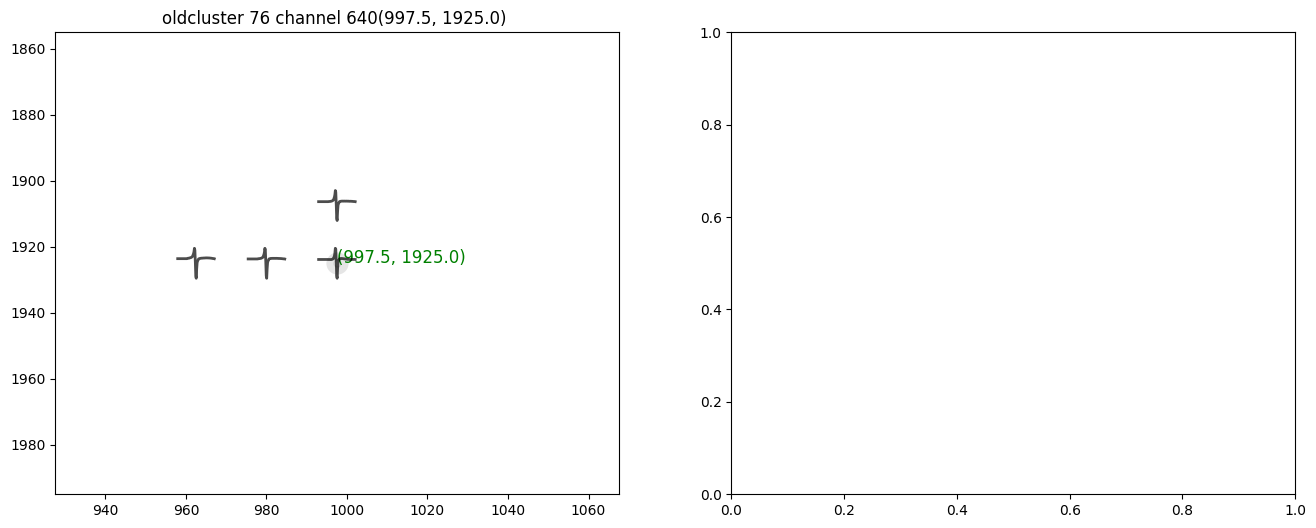

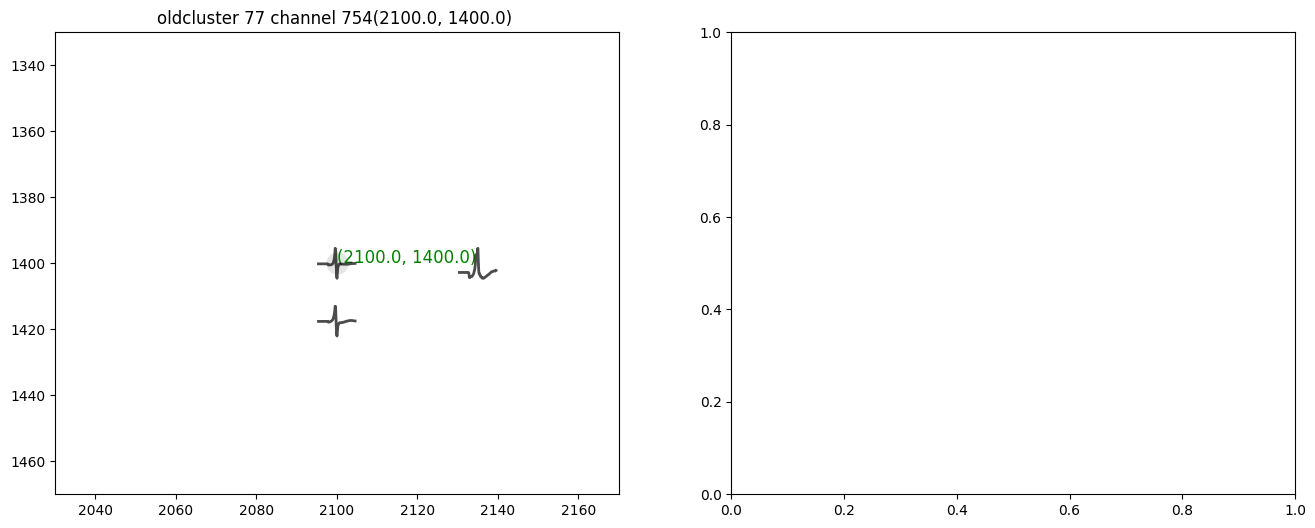

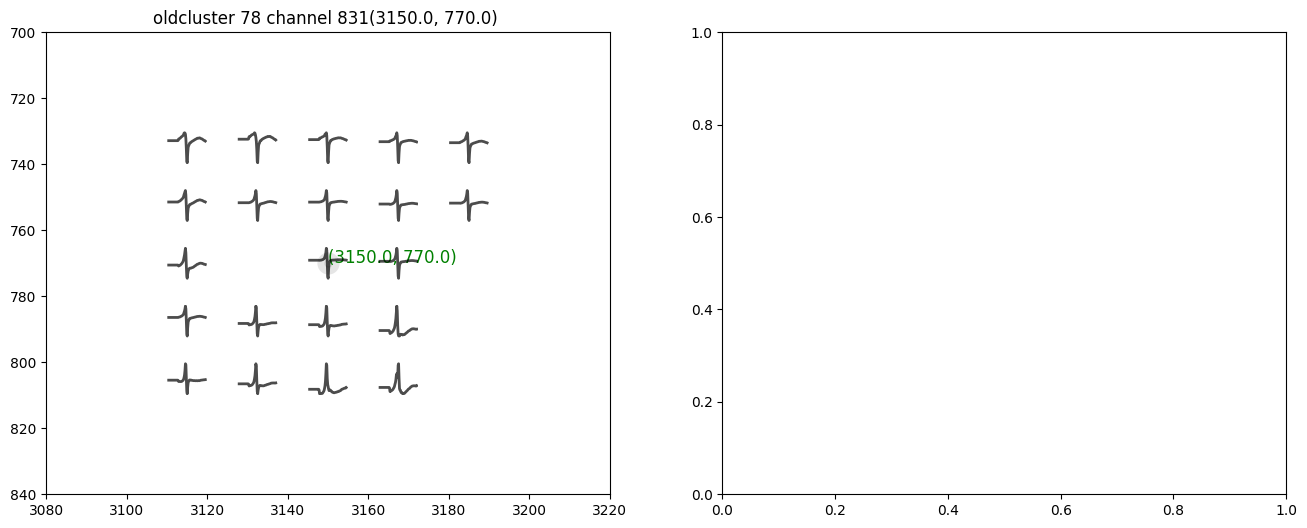

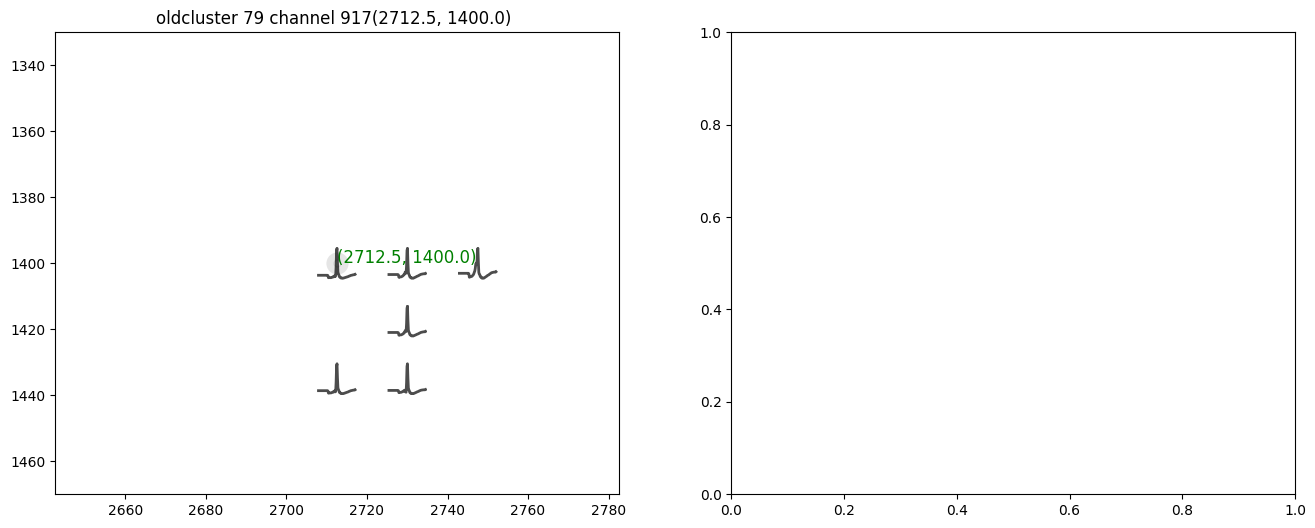

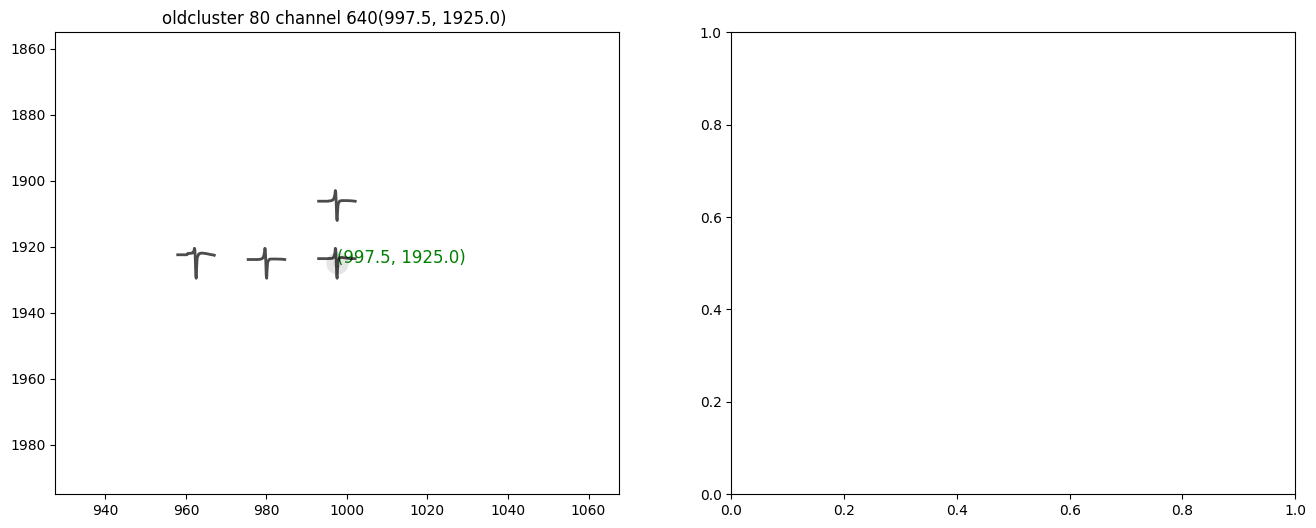

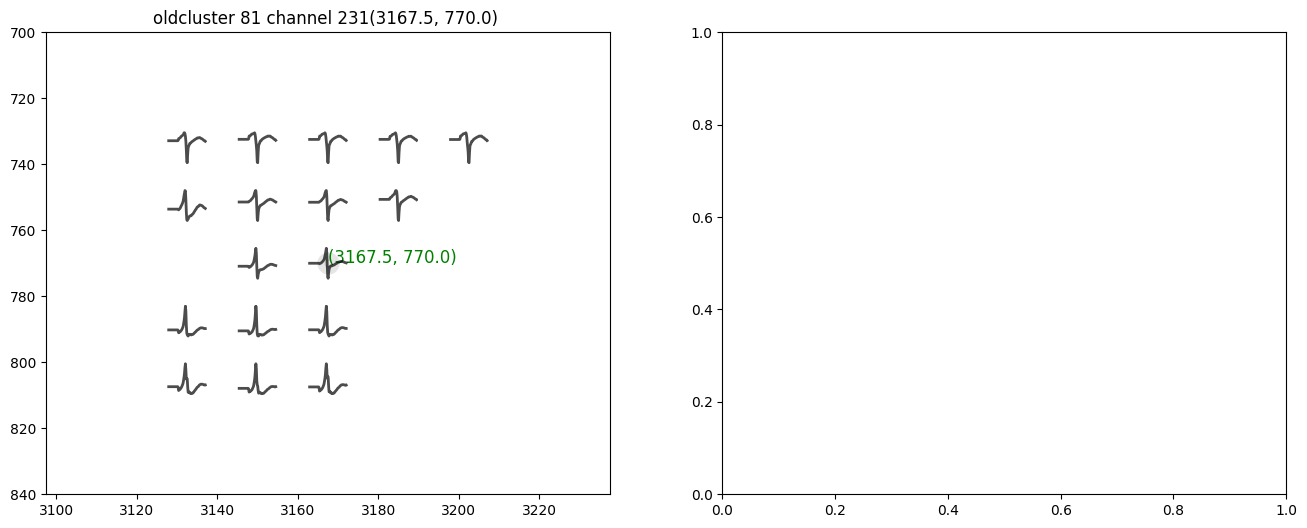

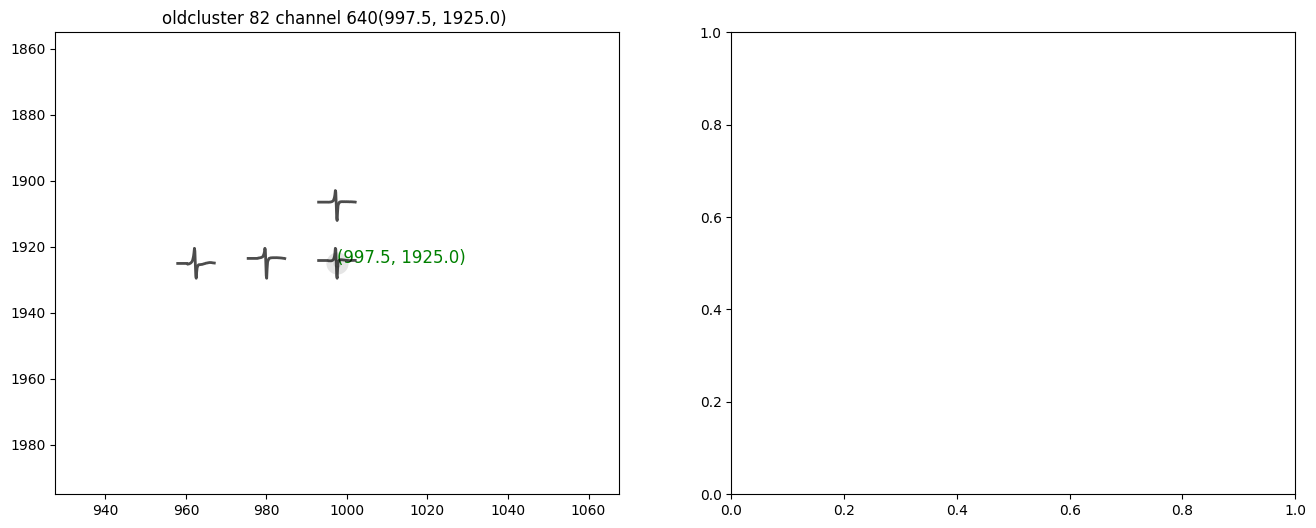

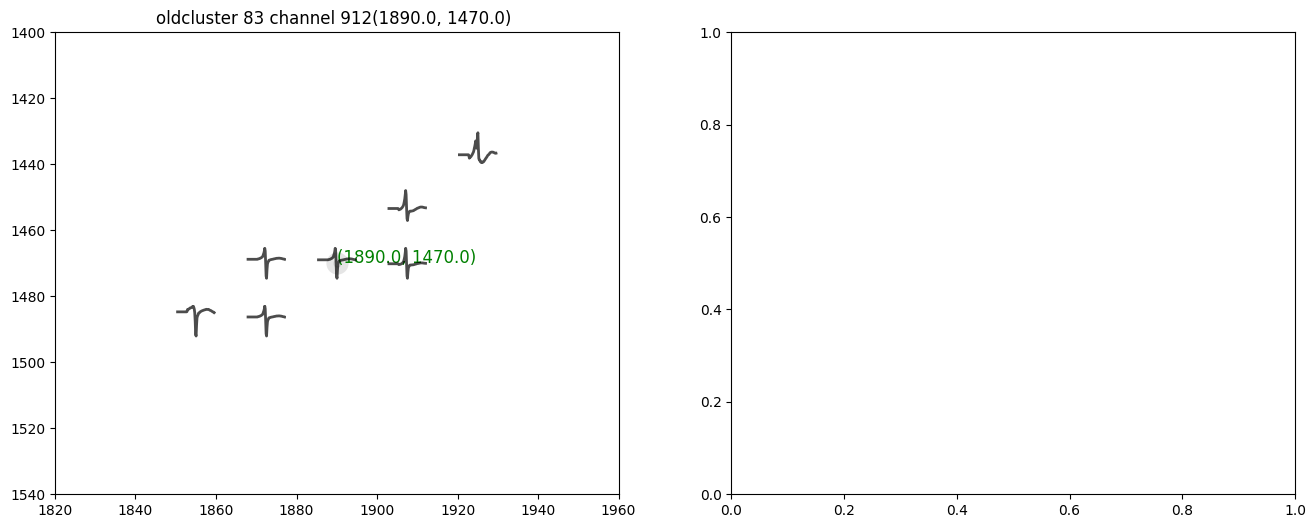

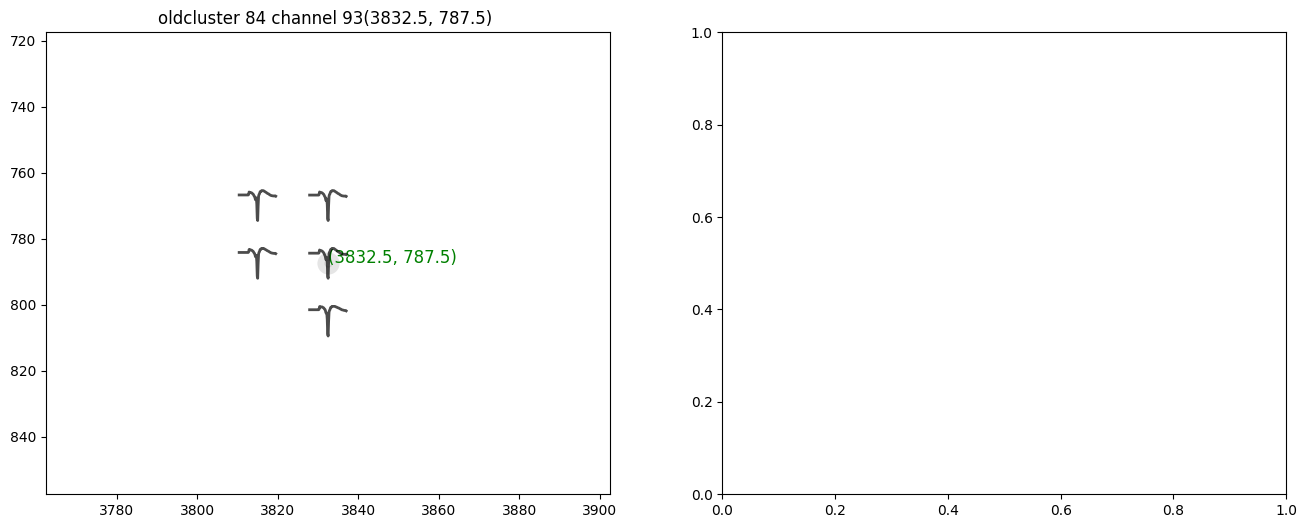

In [34]:
plot_footprint_comp(old_result_path, new_result_path, "old", "new")

### Tests

In [28]:
def plot_1(data, axs=None, **kwargs):
    axs.set_title("plot subfigures")
    axs.text(5, 5, "test")
    axs.invert_yaxis()
    axs.plot(data)
    return axs

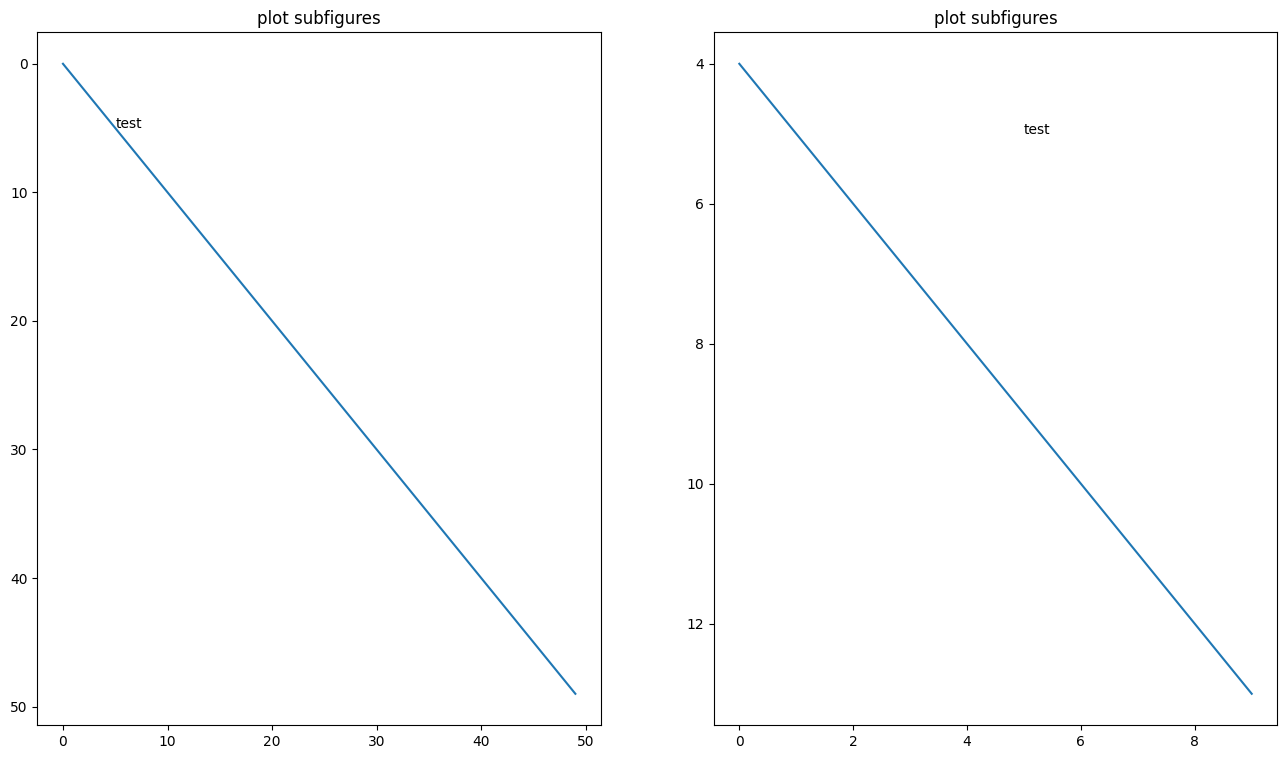

In [29]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(16, 9), facecolor='white')
plot_1(np.arange(50), axs1, color='b')
plot_1(np.arange(4, 14), axs2, color='k')
plt.savefig("subplot_function_test.png", dpi=300)
plt.show()